# **MENG 15100** Lab 2

Welcome to the second lab of MENG 15100: Machine Learning and Artificial Intelligence for Molecular Discovery and Engineering

In this lab, you’ll learn the basics of **Linear Regression**, a foundational machine-learning model.

We’ll walk through the six core steps of training any Machine Learning model:
1. **Data:** Select inputs (features) and outputs (targets).
2. **Model:** Define a function relating inputs to outputs, with *tunable parameters.*
3. **Loss function:** Decide how to measure the model's error
4. **Training:** Optimize the model parameters via *gradient descent.*
5. **Evaluation:** Determine how the trained model performs on separate *test data*
6. **Improvement:** Investigate ways to make the model better!

This lab starts from first principles—**no prior coding experience is required.** For every exercise, you will be provided with baseline Python code, and you will only be asked to make minor edits or adaptations (e.g., change a variable’s value, adjust the number of iterations, or modify a plot’s formatting).

### Note on Lab 2  

Lab 2 will begin with **Section 0**, which asks you to do some partial reading of two scientific papers. This section is designed to help you start practicing how to read and interpret research articles — a skill we’ll keep coming back to throughout the course.  

Please also plan ahead: although the reading is only partial, it is not something you can rush through. To get proper understanding, you should set aside around **30 minutes** to carefully work through Section 0.  

In summary:  
- Section 0 = reading two papers (30 minutes).  
- Sections 1–6 = coding in Python, best done during the lab session.  
- Do the reading early so your lab time can be dedicated to coding practice.  


## Lab Structure and Grading
The lab is organized as follows:
- **Topics** – Broad units (e.g., *1. Exploring the Data, 2.Linear Regression*).
- **Sections** – Subdivisions within each Topic (e.g., *1.4 Train / Test split*).
- **Problems** – Each Section ends with a Problem to be completed in the Jupyter Notebook. Problems may involve:
  - Short-answer questions
  - Modifications to existing Python code
  - Some Problems contain multiple tasks.
  - Each Problem is worth 1 point total, with points divided equally among its tasks.

- **Interactive code** - many sections include interactive graphical user interfaces. The code implementing these functions is located in a custom library titled `menglab`



## Table of Contents

**TIP**: An interactive table of contents is avaialable on the left sidebar.

### 0. Introduction to Molecular Boiling Points

&emsp; 0.1 Molecular Boiling Points <br>
&emsp; 0.2 Linear Regression Models in Scientific Papers

### 1. Dataset

&emsp; 1.1 Loading the Dataset <br>
&emsp; 1.2 Interactive Data Explorer <br>
&emsp; 1.3 Beginning with Linear Alkanes <br>
&emsp; 1.4 Train/Test split <br>


### 2. Model: Linear Regression

&emsp; 2.1 Writing and Plotting our first model <br>

### 3. Loss Function

&emsp; 3.1 Root Mean Squared Error (RMSE) <br>
&emsp; 3.2 Visualizing the Loss Landscape <br>

### 4. Training: Gradient Descent

&emsp; 4.1 Manual Training <br>
&emsp; 4.2 Gradient Descent <br>
&emsp; 4.3 Interactive Gradient Descent <br>

### 5. Evaluation: Testing Sets and Generalization

&emsp; 5.1 Performance Plots <br>
&emsp; 5.2 Model Generalization <br>


### 6. Improving and Expanding the Model

&emsp; 6.1 Underfitting and Polynomial Regression <br>
&emsp; 6.2 Expanding the Dataset to Branched Alkanes <br>
&emsp; 6.3 Overfitting & Regularization <br>
&emsp; 6.4 Multiple Linear Regression <br>
&emsp; 6.5 Modelling the Entire Dataset <br>

# Imports (Execute Once)
Run the code cell below to install and import the modules necessary for this lab:

In [ ]:
# Execute this cell once to import and install modules (may take several seconds)
%pip -q install requests pyreadr rdkit py3Dmol

# menglab library
%pip install -q --no-cache-dir --upgrade --force-reinstall \
  "git+https://github.com/andrewlferguson/MENG15100.git@main#subdirectory=labs/L2/menglab2"

import menglab2 as menglab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# interactive gui settings
from google.colab import output
output.enable_custom_widget_manager()
import plotly.io as pio
pio.renderers.default = "colab"

# Plotting settings
import matplotlib as mpl
mpl.rcParams.update({
    "figure.figsize": (6, 4),
    "figure.dpi": 120,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.35,
    "lines.linewidth": 2.0,
    "lines.markersize": 6,
    "font.size": 12,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.frameon": False,
    "savefig.bbox": "tight",
})
%config InlineBackend.figure_format = 'retina'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# 0 Introduction

## 0.1 Molecular boiling points
In this lab, we’ll build a simple machine learning model to predict a molecule’s **boiling point**—the temperature at which the molecule boils from a liquid to a gas.
- for example, the boiling point of water is 100 °C / 212 °F (at atmospheric pressure).

**Why boiling point?** It reflects how strongly molecules stick together in the liquid—that is, the strength of their **intermolecular forces**. Stronger attractions mean you must supply more heat to pull molecules apart, so:
- Stronger intermolecular forces → higher boiling point

**Goal:** Our model will use basic molecular properties—starting with size (**molecular weight**)—to predict boiling point with a linear regression model. Later, we will add more input features to improve the model.

---

### Boiling Point Video
**Watch the YouTube video below to see a simulation of boiling from a molecular point of view**

(execute the cell to load the YouTube player in Google Colab).


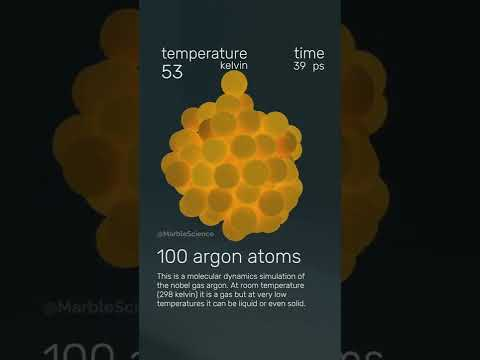

In [ ]:
# Display youtube video in google colab
# Ipython.display is a python module that contains functions like
#   YouTubeVideo which can embed youtube videos for viewing.
from IPython.display import YouTubeVideo

# Replace 'dQw4w9WgXcQ' with your Short's video ID
# For example, if the URL is https://www.youtube.com/watch?v=dQw4w9WgXcQ, the ID is dQw4w9WgXcQ
video_id = 'rHUYYGdByAA'
YouTubeVideo(video_id, width=315, height=560)

---
### Video Recap
At very low temperatures, the argon atoms are a **solid**:
- atoms are held tightly together by intermolecular forces in an ordered crystal lattice.

As the system is heated to about 60 K (–213 °C), it melts to become a **liquid**.
- thermal energy allows the atoms to move past one another while still remaining in contact.

With further heating the atoms boil into the **gas phase**.
- atoms gain enough energy to completely escape their neighbors
- The temperature at which this transition from liquid to gas occurs is known as the **boiling point**.
- For argon, the boiling point is about 87 K (–186 °C), which is relatively low — a sign that the forces holding argon atoms together are quite weak.

**FYI: The video above was produced using [molecular dynamics](https://www.wikiwand.com/en/articles/Molecular_dynamics), a computational method that simulates the real physical forces between atoms and molecules. This technique is not only useful for teaching but is also a focus of active research in molecular engineering labs, including the Ferguson Lab in the PME.**

**OPTIONAL:** Watch the 30-second video below, showing a molecular dynamics simulation of liquid water turning to ice (freezing).


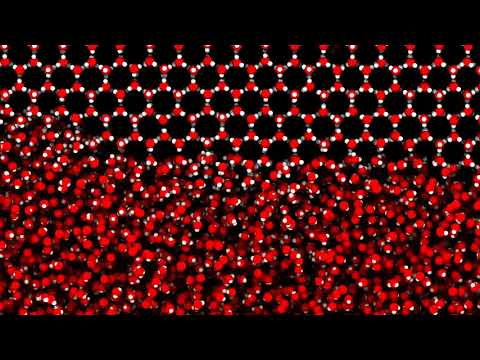

In [ ]:
video_id = 'zRUFzJrDtq0'
YouTubeVideo(video_id, width=560, height=315)

---
### ✅ Exercise 1: Boiling Point comparison [2 points]

Consider **water** (H₂O) and **methane** (CH₄).

- Water molecules stick together due to strong **hydrogen bonds**: each molecule has highly polar O–H bonds that attract each another.

- Methane molecules stick together only by weak **London dispersion forces**, because the molecule is nonpolar.


**Task:** Which of these two molecules has the higher boiling point, and why? **Enter your answer in the text box below.**

**Hint:** Don’t worry if you haven’t studied hydrogen bonds or London dispersion forces yet. For this question, all you need to remember is that hydrogen bonds are relatively strong, while London dispersion forces are relatively weak.

YOUR ANSWER HERE

---
## 0.2 Linear Regression Models in Scientific Papers

Our machine learning model will be based on **real scientific research** published in journal articles ("papers").

We will **skim 2 papers** (linked below) that use **linear regression** to predict the boiling points of different molecules. We will also **recreate some of the results** from these studies.

### Why Read Papers?

1. Reading Scientific Literature is an **important skill** in any field of study.

2. Reproducing published results is an important part of science — it helps us verify that findings are reliable and gives us a foundation to build new ideas and improvements.


---

## How to Read a Scientific Paper

Reading a Paper is **not like reading other types of literature.**.
- **Don’t be discouraged**: It is intimidating, especially for newcomers to a field.
- **It’s normal not to understand everything** - Even experienced researchers often find papers hard to read outside their specialty.
- **Practice matters**: It is a skill you build with practice, not something you're supposed be good at right away.
- **Read nonlinearly**: Do not read cover-to-cover like a textbook or novel! Instead, **follow the step-by-step strategy below:**

---

## Step-by-Step Strategy

### 1. Title and Abstract
- Read the **Title** and **abstract** in full. This is a one-paragraph summary of the entire study.
  - This is the **only** section we will read front-to-back.
  - Don’t get stuck on jargon.  
  - Look for the **one sentence** that summarizes the **key finding** of the paper.  
- After this step, you should be able to answer: *What is this paper about?*  

---

### 2. Skim the Introduction
- The introduction provides **background context** and the **motivation** for the study.  
- Skim quickly:
  - What **problem** are the authors trying to solve?  
  - Why is it important?  
- Skip details and entire paragraphs you don’t understand, but **flag unfamiliar concepts** as things you could look up later.  
- After this step, you should be able to answer: *Why did the authors do this study?*  

---

### 3. Go Straight to the Figures
- The figures contain **all** the main results of the paper.
  - Going to the figures is the most valuable and efficient use of your time.  
- For each figure:  
  - Read the **caption** carefully.  
  - Ask: *What is the key result being shown?*  
  - Try to connect the figure to the main finding from the abstract.  
- At this stage, don’t worry if you don’t fully understand the methods that produced the figure — just focus on *what the result is*.  

---

### 4. Read the Conclusion
- Once you’ve seen the results, skim the **conclusion**
- This section tells you how the authors **interpret their findings**.  
- Ask yourself: *Do the conclusions match what I saw in the figures?*  

---

### 5. Dive Into the Methods & Discussion (Optional, for Later)
- Methods and Discussion sections are often the hardest to read.  
- Dive in if you need to understand *how* the results were obtained (e.g., if you’re planning to replicate or critique the work).  
- Beginners can usually skip this section on the first read.  

---

## Extra Tips
- You can glean **80% understanding from 20% of the text**
- **Don’t read once — read multiple times**:  
  - First pass: big picture (title, abstract, figures).  
  - Second pass: details that matter for your understanding (methods, discussion)   
- **Look up later**: don’t interrupt your reading flow every time you see an unfamiliar term — flag it, and return after the first read.  
- **Talk it through**: papers make more sense when you discuss them with classmates or your instructor.  
- **Remember:** The goal of reading a scientific paper is not to understand every single detail, but to be able to explain **what the authors asked, what they did, what they found, and why it matters.**

---


### ✅ Exercise 2: Skim Paper 1 [9 points]

Our first paper is shown below. We will dive into the **Abstract** and **Introduction** of paper because it is an approachable foundation to the topic of this lab.

## Paper 1: (available on canvas under Modules/Lab2)
Goll, E. S.; Jurs, P. C. *Prediction of the Normal Boiling Points of Organic Compounds from Molecular Structures with a Computational Neural Network Model.* **Journal of Chemical Information and Computer Sciences**, 1999, 39(5), 974–983. https://doi.org/10.1021/ci990071l

**Tasks:**

Read the **Abstract** (step 1 of the strategy guide), and answer the following questions:

1. How many datsets were used in this paper?
2. What two types of machine learning models were trained on these datasets?
3. What property of molecules were the models trained to predict? (The output of the model).
4. In your own words, *What is this paper about?*

Skim the **Introduction** (step 2 of the strategy guide), and answer the following questions:

5. For *nonpolar* molecules, what major property is related to the strength of intermolecular attraction?
6. According to the authors, why is their model useful? (What arduous challenges does it circumvent?)
7. What do the authors call "Type I" Models, "Type II" Models, and "Type III" models?
8. On first reading, which paragraph did you skip entirely (or, which one did you want to skip)? **Remember,** picking which parts to skip/skim is a crucial skill in reading papers!
9. In your own words, *Why did the authors do this study?*

## Enter Your answers below:



1. How many datasets were used in this paper? YOUR ANSWER HERE

2. What two broad classes of models were trained on these datasets? YOUR ANSWER HERE


3. What property of molecules were the models trained to predict? (The output of the model). YOUR ANSWER HERE


4. In your own words, *What is this paper about?* YOUR ANSWER HERE


5. For *nonpolar* molecules, what major property is related to the strength of intermolecular attraction? YOUR ANSWER HERE


6. According to the authors, why is their model useful? (What arduous challenges does it circumvent?) YOUR ANSWER HERE


7. What do the authors call "Type I" Models, "Type II" Models, and "Type III" models?YOUR ANSWER HERE




8. On first reading, which paragraph did you skip entirely (or, which one did you want to skip)? **Remember,** picking which parts to skip/skim is a crucial skill in reading papers! YOUR ANSWER HERE


9. In your own words, *Why did the authors do this study?* YOUR ANSWER HERE

### ✅ Exercise 3: Skim Paper 2 [4 points]

We will now turn to Paper 2 (available on Canvas under Modules/Lab2)

Egolf, L. M.; Wessel, M. D.; Jurs, P. C. *Prediction of Boiling Points and Critical Temperatures of Industrially Important Organic Compounds from Molecular Structure.* **Journal of Chemical Information and Computer Sciences**, 1994, 34(2), 412–421. https://doi.org/10.1021/ci00020a032


- Papers 1 and 2 are written by the same authors, with essentially the same datasets.
- Paper 2 can be thought of as a **precursor** to Paper 1. It shows how their research ideas grew from simple models (linear regression, Paper 2) to more complex ones (nonlinear neural networks, Paper 1).  
- The Introduction, motivation, and datasets are almost identical in both papers. The major difference is the types of models trained.

**Tasks:**

Briefly read the **Abstract**, then skip to **Figure 2**, (step 3 of the strategy guide) read the caption and analyze the figure.

**TIP: We will reproduce Figure 2 in this Lab**

1. What type of model (Type I, Type II, or Type III) is shown in Figure 2?
2. Which axis (x or y) displays *experimental* boiling points, and which axis (x or y) displays *predictions* from the model?
3. The authors include a black diagonal line which marks exactly where the x-coordinate is the same as the y-cordinate. It acts as a visual aid to the reader: what purpose does this line serve?
4. In your own words, *what is the key result being shown in figure 1*?



1. What type of model (Type I, Type II, or Type III) is shown in Figure 2? YOUR ANSWER HERE


2. Which axis (x or y) displays *experimental* boiling points, and which axis (x or y) displays *predictions* from the model? YOUR ANSWER HERE


3. The authors include a black diagonal line which marks exactly where the x-coordinate is the same as the y-cordinate. It acts as a visual aid to the reader: what purpose does this line serve? YOUR ANSWER HERE


4. In your own words, *what is the key result being shown in figure 2*? YOUR ANSWER HERE

# 1 Exploring the Data

The first step in any machine learning project is to carefully **curate your dataset**.
- We will be using [dataset II](https://cdk-r.github.io/cdkr/reference/bpdata.html) from Paper I, which is readily available online.
- The dataset contains boiling points of 277 primarily nonpolar molecules.*

***Note**: The dataset has also been augmented with the following 18 simple alkanes and branched alkanes for pedagogical purposes, to bring the total size of the dataset to 295 molecules
- linear n-alkanes from n=1 (methane) to n=10 (decane)
- branched alkanes including: isobutane, isopentane, neopentane, isohexane, neohexane, isoheptane, neoheptane, and isooctane

## Inputs and outputs
We also need to clearly define the **inputs** and **outputs** of the model.

- **Inputs (features):** the pieces of information the model will use to make predictions.  
- **Outputs (targets):** the values we want the model to predict, based on the inputs.

In our case:

- **Input:** molecular properties (e.g., molecular weight, etc.)  
- **Output:** the boiling point temperature of the molecule  

We can think of the process as a simple flow:

molecular properties (input) → Machine Learning model → boiling point temperature (output)

## 1.1 Loading the Dataset

**Execute the following code to load and inspect the dataset:**
- the data is stored in a **dataframe** from the **pandas** library (similar to an excel spreadsheet)
- the `data.head()` function displays the **first 5 rows** of the dataframe

**The dataset contains the following columns:**  
- **name**: the English name of the molecule  
- **smiles**: a [SMILES string](https://www.wikiwand.com/en/articles/Simplified_Molecular_Input_Line_Entry_System), which encodes the molecular structure (atoms and their connectivity).
- **MW**: molecular weight, in grams per mole (g/mol)  
- **bp_k**: boiling point, measured in [Kelvin](https://www.wikiwand.com/en/articles/Kelvin)  


In [ ]:
data = menglab.load_dataset() # load the datset into in a pandas DataFrame object called 'data'
data.head()                   # display the first 5 rows (the 'head') of the DataFrame

name           smiles       MW   bp_k
0   bromo-trichloro-methane  C(Br)(Cl)(Cl)Cl  198.274  378.0
1  chloro-trifluoro-methane       ClC(F)(F)F  104.458  191.7
2      carbon tetrachloride  C(Cl)(Cl)(Cl)Cl  153.823  349.8
3        tetrafluoromethane      C(F)(F)(F)F   88.003  145.1
4                 bromoform        BrC(Br)Br  252.731  422.3

## 1.2 Interactive Data Explorer

This tool lets you explore the molecules in the dataset with a **3D molecular viewer** and **interactive scatter plot**.

You can look at individual molecules in detail and also compare them with others in the dataset.  

Detailed instructions for how to use the interactive data explorer are available below.


In [ ]:
menglab.data_explorer(data)

### How to Use the Interactive Data Explorer
- **Dropdown menu (top left)**  
  Choose a molecule by name. The selected molecule will be:
  - Highlighted on the scatter plot  
  - Displayed in 3D

- **Molecule panel (left)**  
  Shows an interactive 3D model of the molecule, along with its key properties (name, molecular weight, and boiling point)
  - **Click and drag** to rotate the molecule  
  - **Scroll** to zoom in or out  
  - Atoms appear as **colored balls**, one for each element (see color table below)  
  - Bonds appear as **sticks** connecting the atoms  
  - A semi-transparent surface surrounds the molecule, showing the approximate size and shape of its electron cloud.  

- **Scatter plot (right)**  
  Each point on the plot represents one molecule.  
  - The **x-axis** shows molecular weight  
  - The **y-axis** shows boiling point  
  - **Click** on any point to select that molecule — this will update both the dropdown menu and the 3D viewer automatically  

### Colors of Atoms in the 3D Viewer

| Atom          | Color (Convention)  |
|---------------|----------------------|
| Carbon (C)    | **Gray**             |
| Hydrogen (H)  | **White**            |
| Oxygen (O)    | **Red**              |
| Nitrogen (N)  | **Blue**             |
| Sulfur (S)    | **Yellow**           |
| Phosphorus (P)| **Orange**           |
| Fluorine (F)  | **Light green**      |
| Chlorine (Cl) | **Green**            |
| Bromine (Br)  | **Dark red / Brown** |
| Iodine (I)    | **Purple / Violet**  |



## 1.3 Beginning with Linear Alkanes

Developing a model to predict boiling points for the wide variety of molecules in the full dataset will be complicated.
To build intuition, we will start small: by focusing on just one family of molecules — **the alkanes**.
- Later in the lab, we will expand our model to cover the entire dataset

### What are alkanes?
- **Definition:** Alkanes are hydrocarbons consisting only of **carbon (C)** and **hydrogen (H)** atoms, where the carbons are connected by **single bonds**.  
- **Structure:**  We will begin with *linear (n-alkanes):* a straight chain of carbon atoms.  

### Why start with alkanes?
- **Simplicity:** They are nonpolar, which makes the boiling point primarily dependent on **molecular weight**.
- **Controlled variability:** By examining straight-chain, nonpolar molecules we can see how small structural changes affect physical properties.  
- **Progressive learning:** Understanding trends in alkanes provides a foundation before moving on to more complex molecules.

This progression mirrors the broader goal in AI for molecular sciences: starting with **simple models** and systematically expanding to capture the **complexity of chemical structure–property relationships**.

---

### Linear Alkanes Dataset Explorer

Explore the Linear Alkanes dataset below for the following exercise.




In [ ]:
X_train, X_test, y_train, y_test, dataframe_visualization = menglab.load_alkanes()
menglab.data_explorer(dataframe_visualization)

### ✅ Exercise 4: Exploring the the dataset [4 points]

**Tasks:** Use the interactive data explorer to identify key properties of linear alkanes. Answer the following questions in the text boxes below:

1. What is the molecular weight of **methane**, and how many carbons does it contain?

2. What is the molecular weight of **pentane**, and how many carbons does it contain?

3. What is the molecular weight of **decane**, and how many carbons does it contain?

4. Does boiling point generally increase or decrease with the size of the molecule?

### Enter your answers below:


1. What is the molecular weight of **methane**, and how many carbons does it contain? YOUR SOLUTION HERE


2. What is the molecular weight of **pentane**, and how many carbons does it contain? YOUR SOLUTION HERE



3. What is the molecular weight of **decane**, and how many carbons does it contain? YOUR SOLUTION HERE


4. Does boiling point generally increase or decrease with the size of the molecule? YOUR SOLUTION HERE

## 1.4 Train/Test split

When we loaded the minimal alkanes dataset, we also divided it into two parts:

- **Training data** (`X_train`, `y_train`)
- **Test data** (`X_test`, `y_test`)

Inputs and outputs:
- `X` indicates the variable is an input (molecular weight)
- `y` indicates the variable is an output (boiling point)

### Why do we split the data?
When building a machine learning model, we want it to *learn patterns* from some examples, but we also need a way to check later if it can make good predictions on molecules it hasn’t seen before.  

- The **training set** is what the model looks at to discover the relationship between inputs (like molecular weight) and outputs (boiling point).  
- The **test set** is set aside and not touched during training. Later, in Section 5, we will use these molecules to evaluate how well the model is working on these *never-before-seen* datapoints.  

### How is the split done?
- We take the full dataset and split it into two groups, usually with most of the data in training (e.g. 80%) and the rest in testing (e.g. 20%).  
- The split is random so that both groups still represent the overall variety of molecules.  

---

Think of it like studying for an exam:  
- You **practice** with your training examples.  
- You then check your understanding with a **new set of test questions** that you haven’t practiced on before.  

This way, we’ll be ready to see how well our model performs when it meets new molecules later on.


Text(0.5, 1.0, 'Train/Test split')

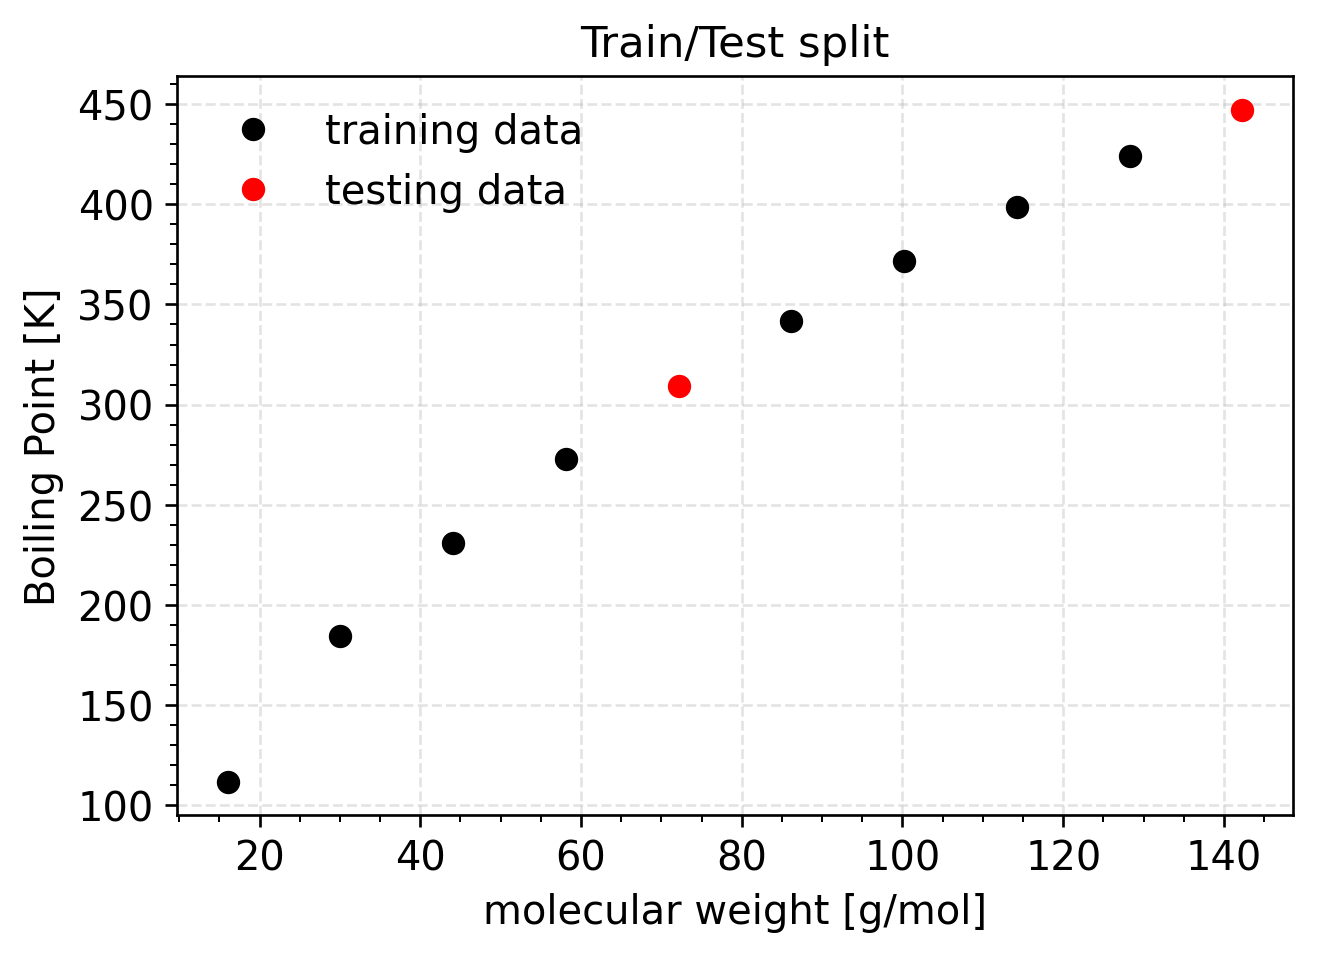

In [ ]:
# plot of training and testing data points
plt.plot(X_train, y_train ,'ko', label='training data')
plt.plot(X_test, y_test ,'ro', label='testing data')
plt.legend()
plt.xlabel("molecular weight [g/mol]")
plt.ylabel("Boiling Point [K]")
plt.title("Train/Test split")

### ✅ Exercise 5: Train/Test split [3 points]

**Task:** Explore the train/test split variables created by `load_alkanes()`.

1. What type of Python object is each of the following: `X_train`, `X_test`, `y_train`, and `y_test`?  
   - **Tip:** Use `print(X_train)` or `print(type(X_train))` (and similarly for the others) to check.

2. How many data points are in the training set and the testing set?  
   - **Tip:** Use Python’s built-in `len()` function.

3. What is the molecular weight and boiling point of the **first molecule** in the training set?  
   - **Tip:** Use square brackets to access elements by index, e.g. `list[index]`.  
   - **Hint:** Python uses **zero-based indexing**, so the first element is at index `0`.

### Enter your answers below:


In [ ]:
# Variables (provided)
# Run this cell to initialize the variables
X_train, X_test, y_train, y_test, _ = menglab.load_alkanes()

1. What type of variable are `X_train`, `X_test`, `y_train`, `y_test`? YOUR ANSWER HERE

In [ ]:
# Task 2
N_train = NotImplemented # YOUR SOLUTION HERE
N_test = NotImplemented # YOUR SOLUTION HERE
print(N_train)
print(N_test)

NotImplemented
NotImplemented


In [ ]:
# Task 3
weight_first_train_molecule = NotImplemented # YOUR SOLUTION HERE
bp_first_train_molecule = NotImplemented # YOUR SOLUTION HERE
print(f"the weight of the first training molecule is : {weight_first_train_molecule:.2f} g/mol.")
print(f"the boiling point of the first training molecule is : {bp_first_train_molecule:.2f} K.")

TypeError: unsupported format string passed to NotImplementedType.__format__

# 2 Linear Regression


## 2.1 Writing and Plotting our First Model

We’ll start with a very simple machine learning model called **Linear Regression**.  

This model assumes that the relationship between the input and the output can be described by a straight line.  

The equation looks like this:

$$ \hat{y} = wx + b $$

where:  
- $x$ = the input (in our case, the **molecular weight**)  
- $\hat{y}$ = the output (the **predicted boiling point**)  
- $w$ = the **slope** of the line (how steep the line is)  
- $b$ = the **intercept** (the point where the line crosses the y-axis)  

---

### What do $w$ and $b$ mean?
Think of $w$ and $b$ as the **adjustable knobs** that let us fit a line to the data:  
- **$w$ (weight or slope)** controls the slope, or how strongly the input $x$ affects the output $\hat{y}$.  
- **$b$ (bias or intercept)** shifts the line up or down on the graph.  

Our goal in machine learning is to find the **best values** for $w$ and $b$ so that the line matches the training data as closely as possible.  

- In the next section, we’ll learn how to define what “best” means using a **loss function**.  
- After that, we’ll see how to actually *find* these best values using a process called **optimization**.  

---

**Tip:** In algebra class, the slope is often written as $m$.  
In machine learning, we usually use $w$, which stands for **weight**—showing how much influence the input has on the output.


### ✅ Exercise 6 : Write a Linear Regression Model [4 points]

**Task:** Implement and test a simple linear regression model step by step.

1. **Write the model function**:  
   Fill in the code for the function called `model(x, w, b)` that returns predictions $\hat{y}$ using the linear regression equation:  

   $$ \hat{y} = w x + b $$
   
2. **Initialize parameters**:  
  assign the following initial values for $w$ and $b$:  
    - $w = 1$  
    - $b = 1$  

3. **Make predictions**:  
Use your `model` function to calculate the predicted boiling points for all the training molecular weights in `X_train`.  

   - **Hint:** Your `model` function should work with both single inputs and lists/arrays:  
     - `model(x_val, w, b)` → returns a single prediction (scalar).  
     - `model(x_list, w, b)` → returns multiple predictions (list or array).  
   - For this task, pass the entire `X_train` list so you get predictions for all the training molecules at once.

4. **Visualize**  
   Modify the code cell to compare your model’s predictions against the actual data.  
   - plot the training features (X) vs targets (y)
   - plot the training features (X) vs model predictions calculated in task 3 above.


In [ ]:
# Task 1: write the model function
def model(x, w, b):
    """Linear Regression Model
    Parameters
    ---
      x: model input, molecular weight [g/mol]
      w: model 'weight' parameter
      b: model 'bias' parameter

    Returns
    ---
      y_hat: model output (predicted boiling point, [K])

    """
    y_hat = NotImplemented ### YOUR SOLUTION HERE
    return y_hat

In [ ]:
# Task 2: initialize parameters
w = NotImplemented ### YOUR SOLUTION HERE
b = NotImplemented ### YOUR SOLUTION HERE
print('Initial parameters: w =', w, ' b =', b)


Initial parameters: w = NotImplemented  b = NotImplemented


In [ ]:
# Task 3: make predictions
y_prediction = NotImplemented ### YOUR SOLUTION HERE
print("Predicted boiling points: ", y_prediction)

# Check your answer - this should assert statement should pass!
answer = np.array([ 17.043, 31.07,  45.097, 59.124,  87.178, 101.205, 115.232, 129.259])
assert(np.allclose(y_prediction, answer, rtol=0.01))
print("✔️ Test passed! Your predictions looks correct.")

Predicted boiling points:  NotImplemented


TypeError: unsupported operand type(s) for -: 'NotImplementedType' and 'float'

TypeError: float() argument must be a string or a real number, not 'NotImplementedType'

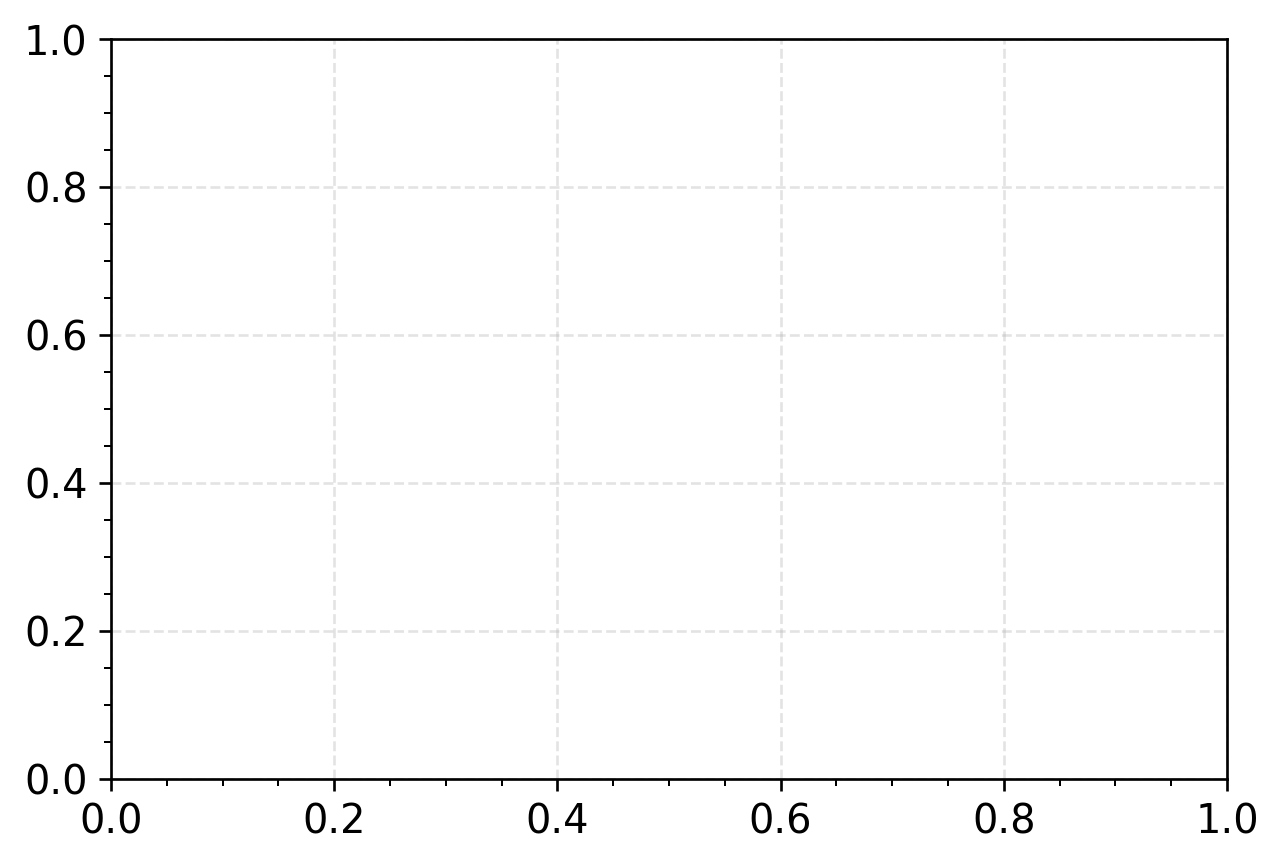

In [ ]:
# Task 4: execute to visualize untrained regression model predictions
plt.plot(NotImplemented, NotImplemented, 'ko', label='training data')     # YOUR SOLUTION HERE
plt.plot(NotImplemented, NotImplemented, '-ro', label='model prediction') # YOUR SOLUTION HERE
plt.xlabel("molecular weight")
plt.ylabel("boiling point")
plt.title("Untrained Linear Regression Model")
plt.legend()

# 3 Loss Function

Now we have a model, but it doesn't look so great:
- We need a way to measure **how well (or poorly)** it makes predictions.  
- This is the role of the **loss function**.  

A loss function is a mathematical formula that measures the difference between the model’s predictions and the true values in the training data:  
- If the predictions are close to the actual boiling points, the loss will be **small**.  
- If the predictions are far from the actual values, the loss will be **large**.  

---

### Analogy: Throwing Darts
Imagine each data point is a dart throw:  
- The bullseye is the true value.  
- Where your dart lands is the model’s prediction.  
- The distance from the bullseye is the **error** for that single prediction.  

The loss function doesn’t just look at one dart — it looks at **all the darts together**.  
It adds up (or averages) the distances from all throws to give an **overall score** of how well the model is doing.  

- If most darts land close to the bullseye, the total loss will be **low**.  
- If many darts land far away, the total loss will be **high**.  

So the loss function measures the **aggregate error** across all predictions, not just one.



## 3.1 Root Mean Squared Error (RMSE)

For this project, we will use the **Root Mean Squared Error (RMSE)** as our loss function.  

It is defined as:

$$
L(w, b) = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \big( y_i - \hat{y}_i \big)^2 }
$$

*Note:* Sometimes the square root does not render properly; (the square root should extend over the entire expression).

where:  
- $N$ = number of training examples  
- $y_i$ = the true boiling point of example $i$  
- $\hat{y}_i = wx_i + b$, the predicted boiling point from our model for example $i$  
- $L(w, b)$ = the overall loss, given the current $w$ and $b$  

---

### Intuition  

1. **Error for one data point**  
   The difference between the true value and the prediction:  
   $$
   \text{error}_i = y_i - \hat{y}_i
   $$

2. **Squared error**  
   Squaring ensures all errors are positive and penalizes larger mistakes more strongly:  
   $$
   \text{squared_error}_i = (y_i - \hat{y}_i)^2
   $$

3. **Mean squared error (MSE)**  
   Taking the average gives the overall error across all data points:  
   $$
   \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
   $$

4. **Root mean squared error (RMSE)**  
   Finally, we take the square root to bring the loss back into the **same units as $y$**  
   (in this case, degrees Kelvin):  
   $$
   \text{RMSE} = \sqrt{\text{MSE}}
   $$

---

### Interpreting RMSE with Examples  

RMSE tells us, on average, how far our predictions are from the true values (in the same units as the target).  

- If **RMSE = 5**, the model’s predictions are typically about **5 K off** from the true boiling points.  
- If **RMSE = 100**, predictions are very inaccurate — on average about **100 K away** from the true boiling points.  

Smaller RMSE values mean the model is making more accurate predictions.  


### Why RMSE?  

- **Same units as the target**: RMSE has the the same units as the model output (Kelvin here). This makes the error easier to interpret.  
- **Penalizes large errors**: Because errors are squared before averaging, RMSE emphasizes big mistakes more strongly than small ones.  
- **Widely used**: RMSE is a standard metric in regression problems, so results are easy to compare with other models and datasets.  

---

### Goal  

Our objective is to **find the values of $w$ and $b$ that make $L(w, b)$ as small as possible**.  
This means the model’s predictions are as close as possible to the true boiling points.  


### ✅ Exercise 7: Write Loss Function [5 points total]

**Task:** Implement and test the loss function (RMSE).

1. **Write the loss function** [4 points]

 Fill in the code for the function called `loss_function(y, y_prediction)` that computes the **Root Mean Squared Error (RMSE)** between the true values and the predictions.  

   - `y` and `y_prediction` are **lists or arrays** of length $N$, representing the true and predicted boiling points for $N$ molecules.  
   - Break the calculation into four steps:  
     1. Calculate the `error`  
     2. Calculate the `squared_error`  
     3. Calculate the `mean_squared_error`  
     4. Calculate the `root_mean_squared_error`  

   **Tip:** Use NumPy functions like `np.square()`, `np.mean()`, and `np.sqrt()` to apply operations to entire arrays at once.  

2. **Evaluate the loss function** [1 point]
   Compute the RMSE for the **training data** using $w = 1$ and $b = 1$.  

   **Tip:** First use your `model` function to generate predictions (`y_prediction`) from the training inputs, then pass those predictions into your `loss_function`.  
  



In [ ]:
# Task 1 Write the loss function
def loss_function(y, y_prediction):
    """Calculates model loss (RMSE)
    Parameters
    ---
      y: List (or numpy array) of true molecular boiling points [K]
      y_prediction: List (or numpy array) of predicted molecular boiling points [K]

    Returns
    ---
      root_mean_squared_error: RMSE loss (floating point value)
    """
    error = NotImplemented ### YOUR SOLUTION HERE
    squared_error = NotImplemented ### YOUR SOLUTION HERE
    mean_squared_error = NotImplemented ### YOUR SOLUTION HERE
    root_mean_squared_error = NotImplemented ### YOUR SOLUTION HERE
    return root_mean_squared_error

In [ ]:
# Task 2 Evaluate loss function
y_prediction = NotImplemented ### YOUR SOLUTION HERE
rmse = NotImplemented ### YOUR SOLUTION HERE
print("RMSE is: {:.2f} K".format(rmse))

# Check your answer - this should assert statement should pass!
assert(np.isclose(rmse, 228.56, rtol=0.01))
print("✔️ Test passed! Your RMSE looks correct.")

TypeError: unsupported format string passed to NotImplementedType.__format__

## 3.2  Visualizing the Loss Landscape

For every choice of $w$ and $b$, we can calculate the loss of our model.  
In other words, the loss itself is a **function**: it takes two inputs ($w$ and $b$) and produces one output (the loss value).  


This makes $L(w, b)$ a function of **two variables**:  
- In algebra, you may have first seen functions of one variable (e.g., $f(x) = x^2$).  
  - These are easy to draw in 2D, with one axis for the input $x$ and one for the output $f(x)$.  
- With **two inputs** (here, $w$ and $b$), the function lives in 3D:  
  - the x-axis for $w$  
  - the y-axis for $b$  
  - the z-axis for $L(w, b)$, the loss value  


### Heat Maps  

Another way to visualize a 3D surface is with a **heat map**:  

- Instead of plotting the surface in 3D, we use **color** to represent the loss at each point $(w, b)$.  
- Dark or cool colors (like blue) indicate **low loss**, while bright or warm colors (like yellow or red) indicate **high loss**.  
- This helps us spot the “valley” (low-loss region) surrounded by higher-loss regions.  

On the heat map, the **optimal solution** appears as the **darkest point** — the bottom of the valley.  

### Try It Out  

Run the code cell below to visualize the **interactive loss landscape** using both a 3D surface plot and a heat map.  

- **Tip:** Click, drag, and zoom to explore the interactive 3D plot.


In [ ]:
menglab.interactive_loss_landscape(X_train, y_train)

### Interpreting the Landscape
The loss landscape looks like a set of hills and valleys:  
- **High points** = bad models (large loss)  
- **Low points** = good models (small loss)  
- The **optimal solution** is the very bottom of the valley — the point where $L(w, b)$ is smallest.  
  
We will find the optimal solution at the bottom of the valley by **training** the model.


### Why can we plot this?
We can make this visualization **only because our model is simple and inexpensive to evaluate**
- We can quickly compute the loss for thousands of different pairs of $(w, b)$.  
- Plotting these values creates a visual 3D surface of the **loss landscape**.

For more complex models with **many parameters** (hundreds, thousands, or even billions), this is no longer possible:  
- The loss landscape still exists, but it lives in extremely high dimensions (one dimension for each parameter).
- We cannot directly visualize it or compute the loss for every combination of paramter values.

**In this simple case, we are “cheating" a little by peeking at something that normally remains hidden in machine learning.**

---


### ✅ Exercise 8: Interactive Loss Landscape [2 points]

**Task:** Use the interactive loss landscape to answer the following questions:

1. Approximately what values of $w$ (slope) and $b$ (intercept) give the optimal fit for this linear regression model?  

2. Approximately what is the RMSE loss at this optimal point?  

### Enter your answers in the code cells below:


In [ ]:
# Task 1
w_approx = NotImplemented ### YOUR SOLUTION HERE
b_approx = NotImplemented ### YOUR SOLUTION HERE

In [ ]:
# Task 2
loss_approx = NotImplemented ### YOUR SOLUTION HERE

# 4 Training

So far, we’ve defined our model equation and learned how to measure its performance using a **loss function**.  
Now comes the next step: **training the model**.  

Training the model means **finding the lowest point in the loss landscape**.  
- In simple cases (like Section 3), we could visualize the entire landscape to see where the minimum lies.  
- For most real-world models, however, the landscape is far too complex and high-dimensional to plot.  
- Instead, we need to use clever techniques to search for the low point without seeing the whole landscape.  


## 4.1 Manual Training  

In practice, training is usually done with algorithms that automatically adjust the parameters $w$ (slope) and $b$ (intercept) so the loss decreases step by step.  

Before we get there, we’ll start by **manual training**:  
- Hand-tuning $w$ and $b$ ourselves.  
- Observing how these changes affect the model’s predictions and the loss.  

### ✅ Exercise 9 : Manually Train the model [2 points]

**Task:** Use the interactive sliders to manually adjust the parameters $w$ (slope) and $b$ (intercept) in order to reduce the loss.  
Your goal is to bring the RMSE within **20% of the minimum value**.  

As you move the sliders:  
- The line on the plot will tilt and shift.  
- The loss value (RMSE) will update in real time to show how well your chosen line fits the data.  
- Keep tuning $w$ and $b$ until the loss is close enough to the minimum.  

**Tips:**  
- A **small $w$** makes the line flatter.  
- A **large $w$** makes the line steeper.  
- Changing **$b$** moves the line up or down.  
- Adjust $w$ and $b$ in the direction that makes the **RMSE** go down.  

**Run the code cell below to launch the interactive plot and try manual training.**  


In [ ]:
menglab.manually_train_linear_regression(X_train, y_train)

Output()

**Enter your solution ("trained" w and b values) below:**

In [ ]:
# Task 1: enter your trained w and b parameter values
w = NotImplemented ### YOUR SOLUTION HERE
b = NotImplemented ### YOUR SOLUTION HERE

## 4.2 Gradient Descent: Training the Model Automatically

So far, you’ve tried **manually adjusting** $w$ and $b$ to get a good fit.  
That was a useful intuition, but it’s not practical when we have millions of data points or thousands of parameters.  
We need a way for the **computer** to do this automatically.  

This is where **Gradient Descent** comes in.   

---

### The Big Idea
Gradient Descent is like a game of **“hot and cold”**.
- Our goal is to make the **loss function** as small as possible.  
- The loss function is like a **landscape of hills and valleys**, where:  
  - The height of the land = the loss value $L(w, b)$  
  - The lowest valley = the best parameters (the minimum loss)  
- We start somewhere on this landscape (with random $w$ and $b$) and **take steps downhill until we reach the bottom.**  

The Big Idea is:  
- The **slope** of the land tells us which way is uphill.  
- If we step *with the slope*, we’ll go uphill (bad).  
- If we step *against the slope*, we’ll go downhill (good).  

So Gradient Descent is just a method of **taking repeated small steps downhill** until we reach the bottom of the valley.

---

### How It Works (Step by Step)
1. **Start** with random values for $w$ and $b$.  
2. **Compute the loss** (how far predictions are from the true values).  
3. **Find the slope** of the loss function (the direction of steepest downhill).  
4. **Update $w$ and $b$** by taking a small step in that downhill direction.  
5. **Repeat** steps 2–4 many times until the loss stops improving.  

---

### The Update Rule
In math form, each update looks like this:

$$
w_{new} = w_{old} - \alpha \cdot \frac{\partial L}{\partial w}
$$

$$
b_{new} = b_{old} - \alpha \cdot \frac{\partial L}{\partial b}
$$

Don’t be scared by the symbols! Let’s break it down:  
- $\frac{\partial L}{\partial w}$ means *how much the loss changes if we increase $w$*. (The slope with respect to $w$.)  
- $\frac{\partial L}{\partial b}$ means *how much the loss changes if we increase $b$*. (The slope with respect to $b$.)
- $\alpha$ (alpha) is called the **learning rate**, which controls how big our steps are.  
- notice the *subtraction* signs, because we want to step downhill, not uphill!
---


### How do we get the slope?

To figure out which way is downhill, we need the **slope of the loss function** at our current position.
- In fact, these formulas can be **derived using tools from calculus**. For now, you don’t need to worry about the details—just know that they tell us:

  - How does the loss change if we increase $w$ a little bit?

  - How does the loss change if we increase $b$ a little bit?

Without going through the derivations, here are the equations:

$$
\frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^N (\hat{y}_i - y_i)\,x_i
$$  

$$
\frac{\partial L}{\partial b} = \frac{2}{N} \sum_{i=1}^N (\hat{y}_i - y_i)
$$  

---


### Intuition with an Analogy
Imagine you’re **hiking in the mountains on a foggy day**:  
- You can’t see the bottom of the valley, but you want to get there.  
- You feel the ground around you to figure out which way slopes downward.  
- You take a small step downhill.  
- Repeat until you reach the valley floor.  

Next, we’ll implement Gradient Descent in code so you can watch $w$ and $b$ being updated automatically until the model finds its best fit.  


### ✅ Exercise 10: Write Gradient Descent Step [4 points total]

You are provided with a helper function `gradient(w, b)` that returns the slopes $(\frac{\partial L}{\partial w}$, $\frac{\partial L}{\partial b})$ in the w and b directions according to the equations above derived using calculus.

Now we will implement the **Gradient Descent algorithm** step by step.  

**Tasks:** [2 points each]

1. **Implement one gradient descent step.**

    - Complete the function `gradient_descent_step(w, b, learning_rate)`.

    - This function takes in the current parameter values $w$, $b$, and a learning rate $\alpha$.

   - Inside the function:  
     - Call `gradient(w, b)` to compute the slopes with respect to $w$ and $b$.  
     - Apply the **gradient descent update rule** to calculate the new values of $w$ and $b$.  
     - Return the updated $w$ and $b$.

2. **Take one gradient descent step**
   - Start from $w = 1$, $b = 1$.  
   - Use `gradient_descent_step` with a learning rate of $\alpha = 0.00002`.  

   - Print the new values of $w$ and $b$ after one update step.  


In [ ]:
# Gradient function (provided)
# Run this cell to define the function so you can use it later
def gradient(w, b):
  '''Calculates the gradient of the loss function
  Parameters
  ---
    w: model weight parameter
    b: model bias parameter

  Returns
  ---
    slope_w: (dL/dw) Slope of the loss function in the w direction
    slope_b: (dL/db) Slope of the loss function in the b direction
  '''
  y_pred = model(X_train, w, b)
  error = y_pred - y_train
  N = len(y_pred)

  slope_w = 2/N * np.dot(error, X_train)
  slope_b = 2/N * np.sum(error)
  return slope_w, slope_b

In [ ]:
# Task 1: Implement gradient descent step
def gradient_descent_step(w, b, learning_rate):
  '''Takes one step of gradient descent, returns updated w and b parameters
  Parameters
  ---
    w: model weight parameter
    b: model bias parameter
    learning rate: gradient descent learning rate

  Returns
  ---
    w: new model weight parameter after one gradient descent step
    b: new model bias parameter after one gradient descent step
  '''
  slopw_w, slope_b = NotImplemented ### YOUR SOLUTION HERE
  w = NotImplemented ### YOUR SOLUTION HERE
  b = NotImplemented ### YOUR SOLUTION HERE
  return w, b

In [ ]:
# Task 2: Take one gradient descent step
w = 1
b = 1
learning_rate = 0.00002
w_new, b_new = NotImplemented ### YOUR SOLUTION HERE
print("New values for w: ", w_new, ", and b: ", b_new)

# Check your answer - this should assert statement should pass!
assert(np.allclose(np.array([w_new, b_new]), np.array([1.73, 1.01]), rtol=0.01))
print("✔️ Test passed! Your predictions looks correct.")

TypeError: cannot unpack non-iterable NotImplementedType object

## 4.3 Interactive Gradient Descent, Step by Step

This interactive tool lets you **train a linear regression model** using **gradient descent** in a step-by-step fashion.  
The interface combines three synchronized plots with controls for stepping through training, resetting, and adjusting parameters.  

Detailed instructions for how to use the interactive gradient descent interface are provided below the figure.

In [ ]:
menglab.interactive_gradient_descent(X_train, y_train)

### How to Use Interactive Gradient Descent

- **Controls**  
  - **Step**: take one (or more) gradient descent steps.
  - **Steps per click**: how many steps to take each time you press *Step*.  
  - **Reset**: return to the optimal solution.  
  - **Learning rate (α)**: controls the size of each step.  
  - **Init w / Init b**: set custom starting values for slope ($w$) and intercept ($b$).  
  - **Apply start**: apply your chosen initialization.  
  - **Auto-run**: continue stepping automatically until convergence or a maximum number of iterations.  

- **Plots**  
  1. **Loss Heatmap**  
     - Heatmap of RMSE as a function of $w$ and $b$.  
     - The gradient descent trajectory is shown as a path.  
  2. **Model vs Training Data**  
     - Scatter plot of the training data.  
     - Displays the current regression line and the optimally trained reference line.  
  3. **Training Curve (RMSE vs Iteration)**  
     - Tracks how the loss changes across iterations.  
     - Should decrease as the model improves.  

### ✅ Exercise 11: Interactive Gradient Descent [3 points]

**Tasks** Experiment with different settings with interactive Gradient Descent. For the following questions, assume the initial starting point for training is is $w = 1$, $b=1$.

1. Approximately how many steps does it take to reach the optimum using a learning rate of 0.2?

2. What happens if you decrease the learning rate to 0.005? Approximately many steps does it take to reach the optimum?

    **Hint:** Click the "Apply Start" box to return to your initial settings for $w$ and $b$.

    **Hint:** Check the "auto-run" box to automatically take 500 steps

3. What happens if you increase the learning rate $\alpha$ to 2? Does the algorithm ever reach the optimum value?

    **Hint:** If odd behavior is occuring, make sure to uncheck the "auto-run" box.




1. YOUR ANSWER HERE

2. YOUR ANSWER HERE

3. YOUR ANSWER HERE

### ✅ Exercise 12: Write a Gradient Descent Loop [2 points]

**Task:** Implement a full automatic gradient descent loop and plot the loss over time.

1. **Complete the function `train(w, b, learning_rate, n_steps)`**  
   - In each iteration of the `for` loop, call your previously written `gradient_descent_step(w, b, learning_rate)` to update `w` and `b`.  

2. **Train and visualize**  
   - Start from **$w = 1$**, **$b = 1$**, with **learning rate = 0.0001**.  
   - Run for **100,000 steps**.  
   - Execute the cell to plot **loss vs. gradient descent step**.

> **Note:** This implementation differs slightly from the one used in the previous 'interactive gradient descent' tool.  
> As a result, the loss values for the same learning rate will not match exactly. For reference, the interactive gradient descent tool uses *data standardization* which decreases the number of steps needed to train the model and increases the choice for step size.


In [ ]:
# Task 1 Complete the 'train' function
def train(w, b, learning_rate, n_steps):
  '''Trains linear regression model using gradient descent for n_steps
  Parameters:
  ---
    w: model slope
    b: model intercept
    learning_rate: gradient descent learning rate
    n_steps: number of gradient descent steps to take

  Returns:
  ---
    w: trained model slope
    b: trained model intercept
    loss_history: list of model loss values for each gradient step.
  '''
  loss_history = []

  for i in range(n_steps):
    # take one step of gradient descent
    w, b = NotImplemented ### YOUR SOLUTION HERE

    # calculate loss and append it to a loss_history list
    y_prediction = model(X_train, w, b)
    loss = loss_function(y_train, y_prediction)
    loss_history.append(loss)

  return w, b, loss_history

In [ ]:
# Task 2, train the
learning_rate = NotImplemented ### YOUR SOLUTION HERE
w_init = NotImplemented ### YOUR SOLUTION HERE
b_init = NotImplemented ### YOUR SOLUTION HERE
n_steps = NotImplemented ### YOUR SOLUTION HERE
w, b, loss_history = NotImplemented ### YOUR SOLUTION HERE

plt.plot(loss_history)
plt.title("Model Loss vs Gradient Descent Iteration")
plt.xlabel("Gradient Descent step number")
plt.ylabel("Model Loss (RMSE) [K]")

TypeError: cannot unpack non-iterable NotImplementedType object

# 5 Model Evaluation
We trained our model using the **training data**. Now it’s time to answer a simple question:

> **How well does the model work on molecules it hasn’t seen before?**

That’s exactly what the **test set** (`X_test`, `y_test`) is for. We kept these molecules separate so we could make an honest check at the end.

---

### What “evaluation on the test set” means
1. **Freeze the model** (no more training or tweaking).
2. **Make predictions** for `X_test`.
3. **Compare** those predictions to the true values `y_test` using the `loss_function`

## 5.1 Performance Plots  

We can visualize model performance with two types of plots:  

---

### Regression Plot  
- This plot shows the **training data points** (molecular weight vs. boiling point) along with the **regression line** predicted by our model.  
- It helps us see how well the model’s line fits the actual data distribution.  
- A good fit will have the line passing close to most of the data points.  

---

### Parity Plot  
- **Figure 2** from the Paper we read in section 0 is a **parity plot**!
- This plot compares the **true boiling points** (on the x-axis) against the **model’s predicted boiling points** (on the y-axis).  
- If the model were perfect, every point would fall exactly on the **diagonal line $y = x$**.  
- Points above the diagonal are **over-predictions** (model predicts too high),  
  while points below the diagonal are **under-predictions** (model predicts too low).  
- The closer the points cluster around the diagonal, the better the model’s accuracy.  


---

Together, these plots give us both a **visual check of fit** (regression plot) and a **direct measure of prediction accuracy** (parity plot).  




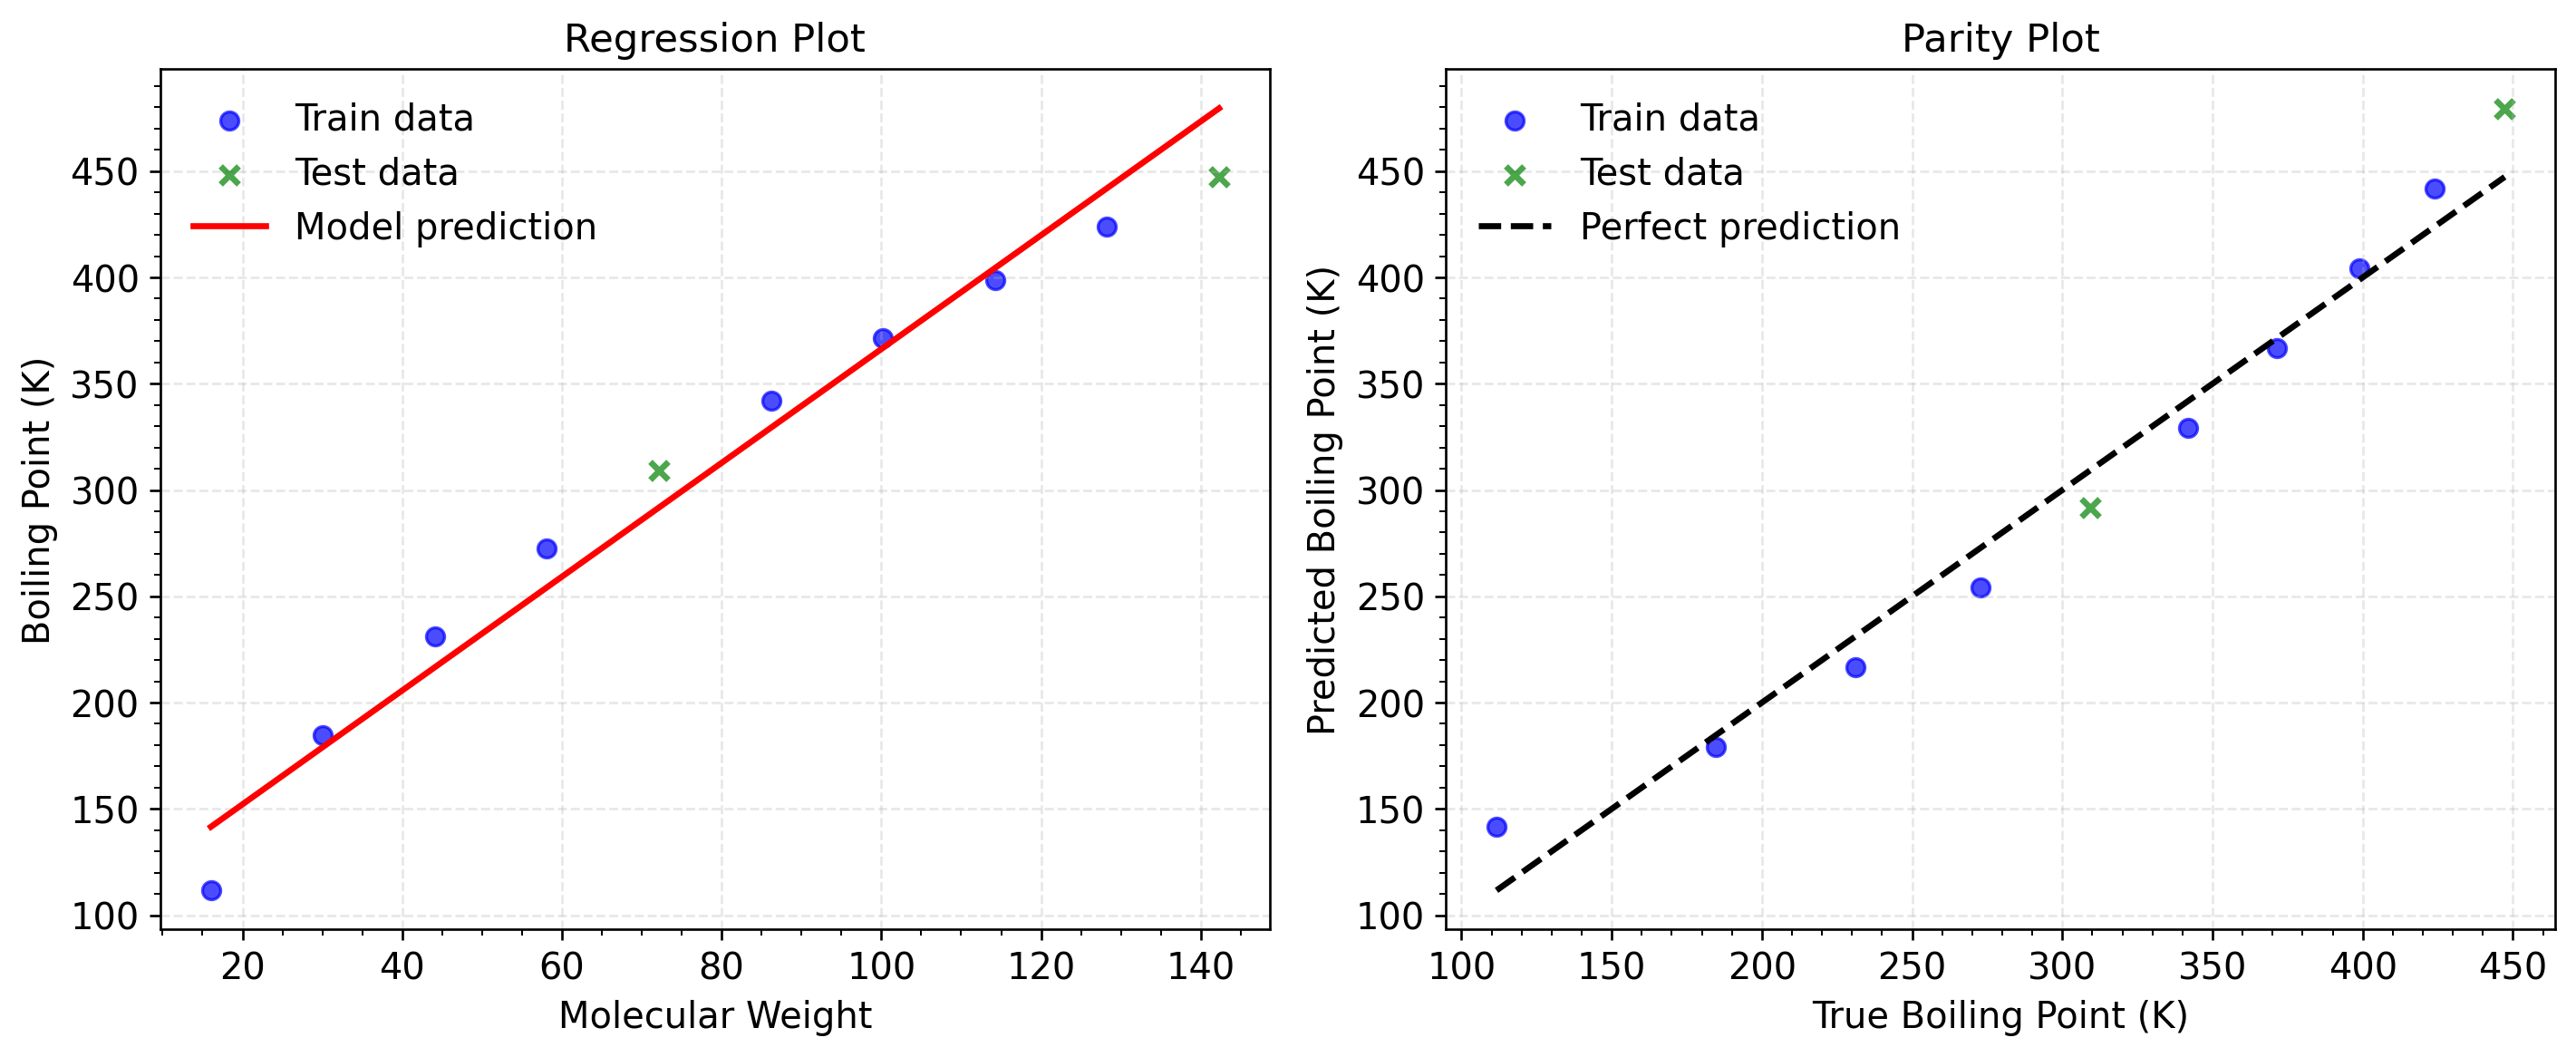

In [ ]:
# w and b are defined in the previous section, from model training.
menglab.plot_performance(w, b, X_train, X_test, y_train, y_test)

## 5.2 Model Generalization  

The performance plots give us a **visual check** of how well the model fits the data, but the **ultimate measure of performance** is a **numerical metric**.  
In our case, that metric is the **RMSE loss on the testing set**.  

- The **training RMSE** measures how well the model fits the data it was trained on.  
- The **testing RMSE** measures how well the model can make predictions on new, unseen data.  

---

The testing loss is the **true benchmark** of performance.  

- If the testing loss is **close to the training loss**, the model is able to **generalize** its predictions to new data.  
- If the testing loss is **much higher than the training loss**, the model is not **generalizing** to new data.
- A common pitfall is to focus only on minimizing training loss.  
  - But training loss **doesn’t matter on its own**—what matters is whether the model performs well on unseen data.  


The goal in machine learning is not just to fit the training set, but to build a model that can **generalize**.  



### ✅ Exercise 13: Test set performance [3 points]

**Tasks:**  

1. **Make predictions**  
   - Use your `model` function to calculate predictions for both the training data (`y_pred_train`) and the testing data (`y_pred_test`).
   - optimal values for w (`w_opt`) and b (`b_opt`) are provided for grading purposes, but would otherwise be determined through training.

2. **Calculate RMSE loss**  
   - Compute the RMSE loss for the model on both the training and testing sets.  
   - Run the code cell to generate a bar plot comparing training vs. testing loss.  

3. **Interpret the results**  
   - Which is higher: the loss on the training set or the loss on the testing set?  
   - **What does this tell you about the model’s ability to generalize? (Is it generalizing?)**


In [ ]:
# Variables (provided)
# Execute this cell to define the variables
w_opt = 2.66
b_opt = 99.7

In [ ]:
# Task 1
y_pred_train = NotImplemented # YOUR SOLUTION HERE
y_pred_test = NotImplemented # YOUR SOLUTION HERE
print(f"The predictions for the model on the training data are: {y_pred_train}")
print(f"The predictions for the model on the testing data are: {y_pred_test}")

The predictions for the model on the training data are: NotImplemented
The predictions for the model on the testing data are: NotImplemented


In [ ]:
# Task 2
loss_train = NotImplemented # YOUR SOLUTION HERE
loss_test = NotImplemented # YOUR SOLUTION HERE
print(f"The loss for the model on the training data is: {loss_train:1f}")
print(f"The loss for the model on the testing data is: {loss_test:.1f}")

TypeError: unsupported format string passed to NotImplementedType.__format__

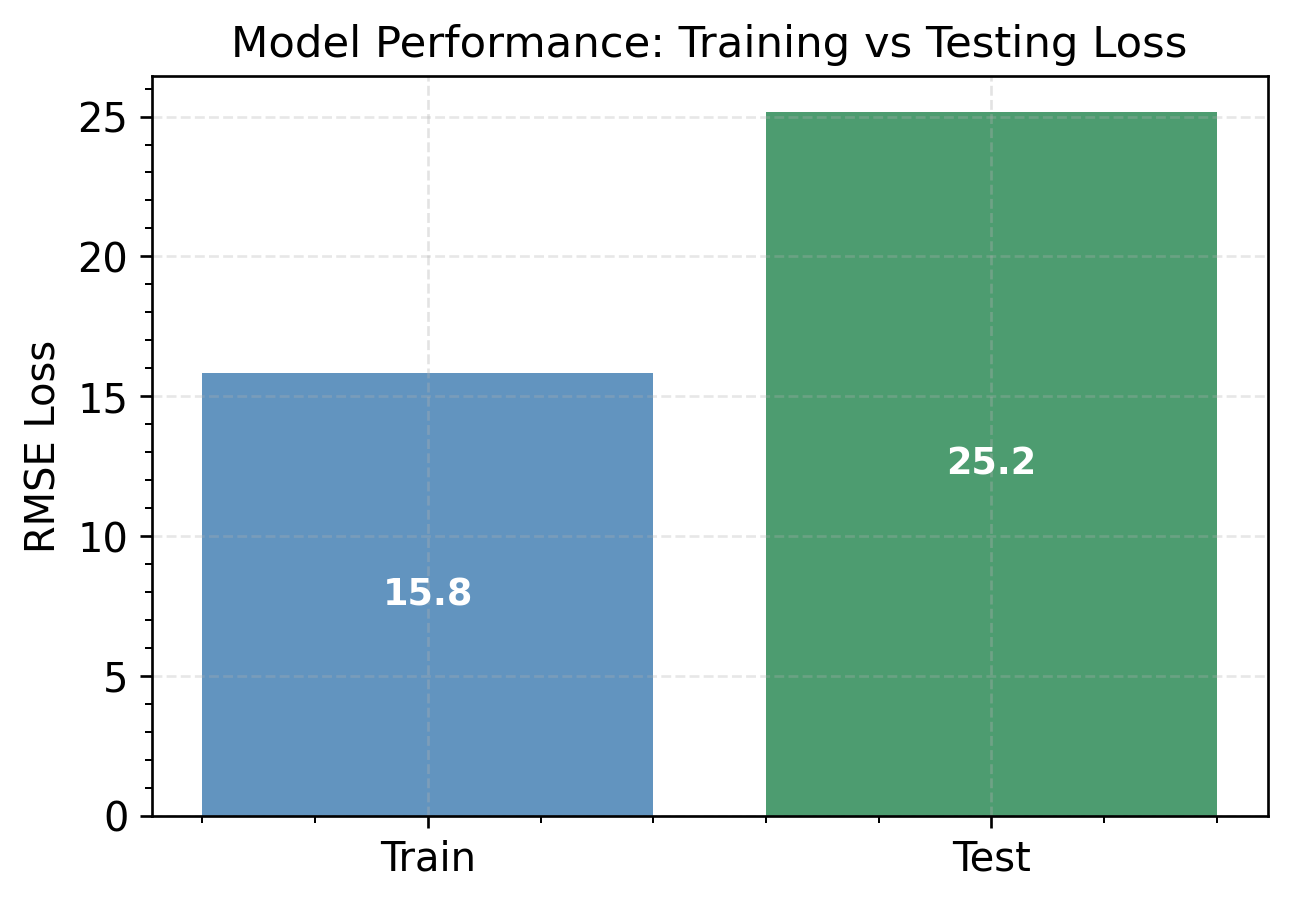

In [ ]:
# Task 3: Plot results and Analyze (enter your answer in the text cell below)
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(["Train", "Test"], [loss_train, loss_test],
              color=["steelblue", "seagreen"], alpha=0.85)

# Add value labels inside bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f"{height:.1f}",
            ha='center', va='center', fontsize=11, color="white", fontweight="bold")

ax.set_ylabel("RMSE Loss")
ax.set_title("Model Performance: Training vs Testing Loss")
ax.grid(axis="y", alpha=0.3)

plt.show()

Task 3: Which is higher: the loss on the training set or the loss on the testing set?  What does this tell you about the model’s ability to generalize? (Is it generalizing?)
YOUR ANSWER HERE


# 6 Improving the model


## 6.1 Underfitting (the problem)

Our model is not performing as well as we would like.
- Currently, **Our training AND test losses are both relatively large**, as seen in the previous section.
- This situation is called **underfitting**
- Underfitting indicates the model is **too simple** for the pattern we’re trying to learn.

Our straight-line model (boiling point vs. molecular weight) captures the **trend** but misses the **curvature** in the data!


## Polynomial Regression (a solution)
**Idea:** We can expand the inputs with new **features** so the model can *bend* to fit the data.  
The simplest upgrade is to let the model use powers of molecular weight: $x, x^2, x^3, \dots$ — this is **polynomial regression**.

$$
\hat{y} = b \;+\; w_1 x \;+\; w_2 x^2 \;+\; \cdots \;+\; w_d x^d
$$

- $x$ = molecular weight  
- $d$ = polynomial degree (start with 2 or 3)  

Even though it’s called “polynomial regression,” it’s still **linear regression** under the hood — just on **expanded features**:
- *linear* refers to the *features* $[x, x^2, x^3...]$ being incorporated linearly into the model.
- Each feature is multiplied by a weight $w_i$ and simply added to the model prediction: The model is **linear** in the weights $w_i$

### Why this helps
Adding $x^2, x^3, \ldots$ lets the fitted curve **bend**, which often matches physical property trends better than a strict straight line.
- We can also use other functions of $x$, such as $log(x)$ which curve in different directions


In [ ]:
X_train, X_test, y_train, y_test, _ = menglab.load_alkanes()
model = menglab.interactive_polynomial_regression(X_train, X_test, y_train, y_test)

### ✅  Exercise 14: Polynomial Regression Models [3 points total]

**Tasks [1 point each]:** Train 5 polynomial regressions using the following features:

- Model 1, features: $[x]$
- Model 2, features: $[x, x^2]$
- Model 3, features: $[x, x^2, x^3]$
- Model 4, features: $[x, x^2, x^3, x^4]$
- Model 5, features: $[x, x^2, x^3, x^4, \log(x)]$



1. What is the loss (RMSE) for each of the five models above? Enter the loss in the cell below. Execute the code cell to display a bar graph of model losses

2. Which is the best model, (lowest testing loss)? Answer in the text box provided below.

3. Does adding additional features always improve the model (decrease test loss), in this case? Answer in the text box provided below.

In [ ]:
# Variables (provided)
# Execute this cell to define the provided variables
training_losses = [0,0,0,0,0]
testing_losses = [0,0,0,0,0]
model_names = ["model 1", "model 2", "model 3", "model 4", "model 5"]

TypeError: unsupported operand type(s) for +: 'int' and 'NotImplementedType'

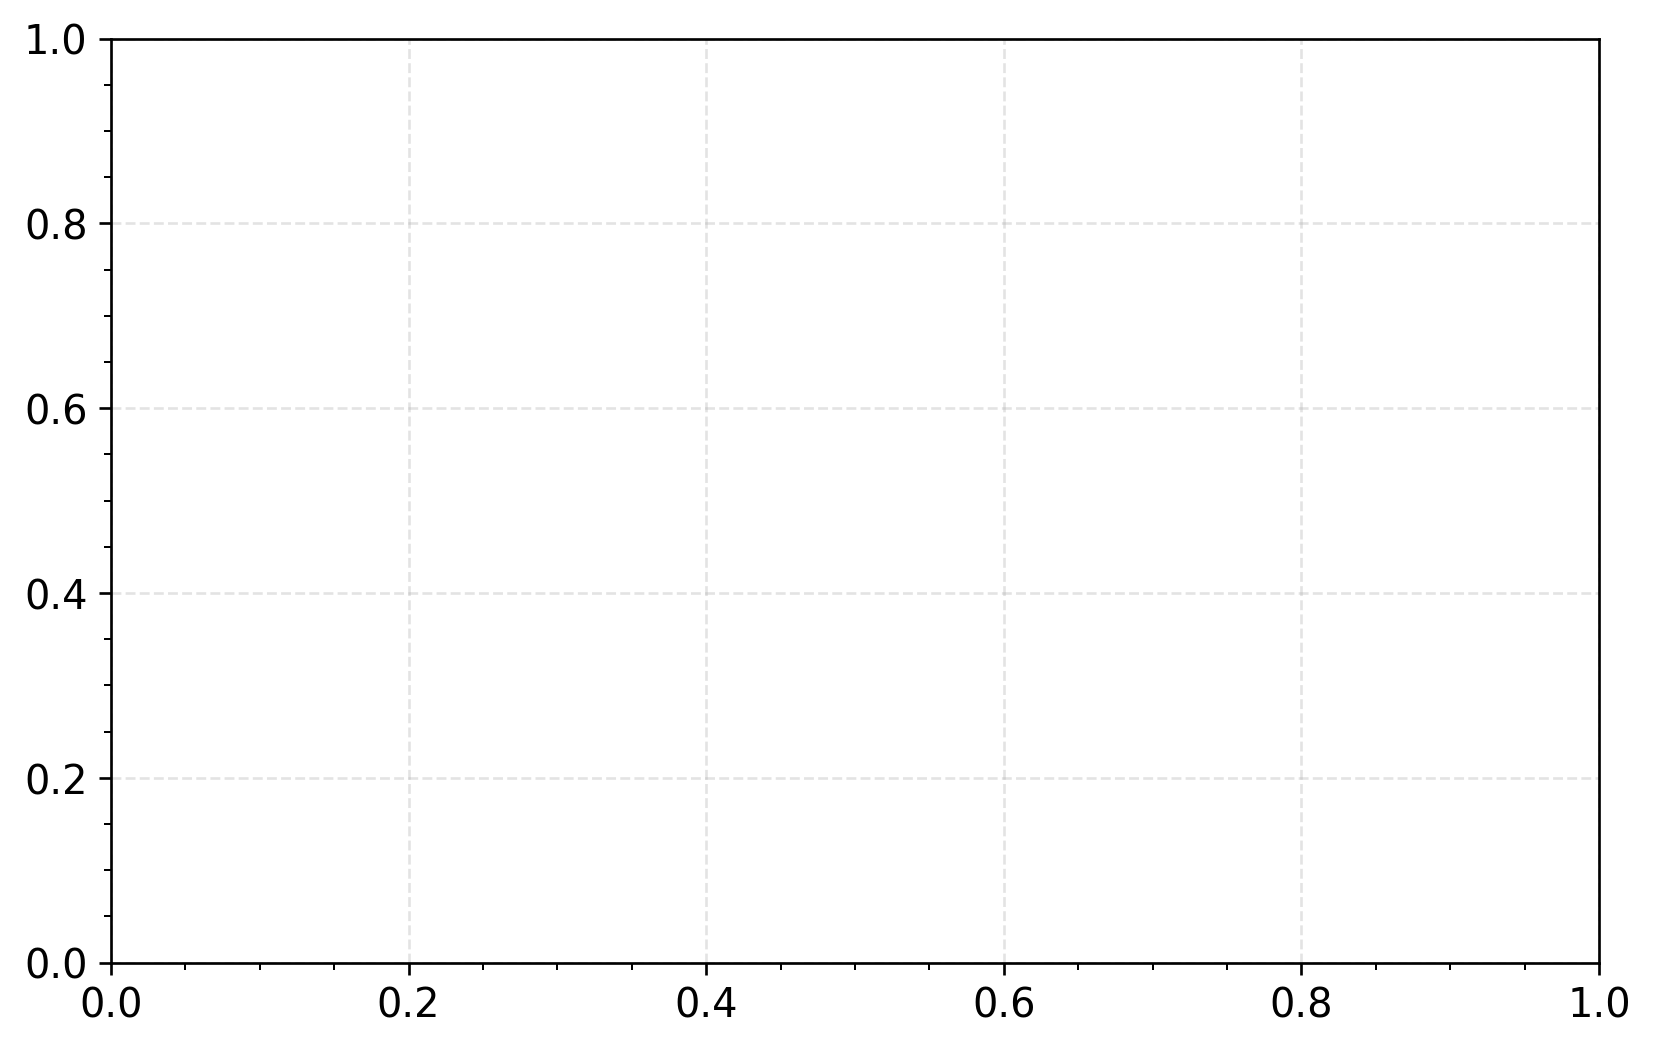

In [ ]:
# Task 1
training_losses[0] = NotImplemented # model 1, YOUR ANSWER HERE
training_losses[1] = NotImplemented # model 2, YOUR ANSWER HERE
training_losses[2] = NotImplemented # model 3, YOUR ANSWER HERE
training_losses[3] = NotImplemented # model 4, YOUR ANSWER HERE
training_losses[4] = NotImplemented # model 5, YOUR ANSWER HERE

testing_losses[0] = NotImplemented # model 1, YOUR ANSWER HERE
testing_losses[1] = NotImplemented # model 2, YOUR ANSWER HERE
testing_losses[2] = NotImplemented # model 3, YOUR ANSWER HERE
testing_losses[3] = NotImplemented # model 4, YOUR ANSWER HERE
testing_losses[4] = NotImplemented # model 5, YOUR ANSWER HERE

menglab.plot_model_losses(model_names, training_losses, testing_losses)

Task 2: Which is the best model, (lowest testing loss)?  YOUR SOLUTION HERE

Task 3: Does adding additional features always improve the model (decrease test loss), in this case? YOUR SOLUTION HERE

## 6.2 Expanding to Branched Alkanes

Now that we’ve mastered **straight-chain (n-) alkanes**, let’s expand to **branched alkanes** and see how branching changes boiling points.

### What “branching” means
- Alkanes are hydrocarbons with only single C–C and C–H bonds (general formula $\,\mathrm{C_nH_{2n+2}}$).
- **Isomers** share the same molecular formula (and thus the same molecular weight) but differ in **connectivity/shape**.
- In branched isomers, some carbons have **more than two** carbon neighbors (secondary, tertiary, quaternary carbons), creating **side chains** off the main skeleton.

### How branching affects boiling point
At a **fixed carbon count $n$** (same molecular weight), **more branching $\Rightarrow$ lower boiling point**.  
Why? Branching makes molecules **more compact**, reducing **surface area** for intermolecular contact. With less contact area, **London dispersion forces** are weaker, so less energy (lower temperature) is required to boil.

### Why add branched alkanes to our dataset?
- They **decouple** “mass” from “shape.” Among isomers, molecular weight is **constant**, so any boiling-point differences are largely due to **shape/branching**.
- This makes a great testbed for improving the model: beyond $x=\text{MW}$, we now add **shape features**.


## Use the data explorer to visualize the branched molecules in the new, expanded dataset

In [ ]:
X_train, X_test, y_train, y_test, data_visualization = menglab.load_expanded_alkanes()
menglab.data_explorer(data_visualization)

In [ ]:
model = menglab.interactive_polynomial_regression(X_train, X_test, y_train, y_test)

### ✅ Exercise 15: Training branched alkane model, Part 1. [3 points total]

**Task: [1 point each]** Train 5 polynomial regressions on the branched alkanes dataset using the following features

- Model 1, features: $[x]$
- Model 2, features: $[x, x^2]$
- Model 3, features: $[x, x^2, x^3]$
- Model 4, features: $[x, x^2, x^3, x^4]$
- Model 5, features: $[x, x^2, x^3, x^4, \log(x)]$


1. What is the loss (RMSE) for each of the five models above? Enter the loss in the cell below and execute the code cell to display a bar graph of model losses.

2. Which is the best model (lowest testing loss)?

3. Does adding additional polynomial always improve the model, in this case? Answer in the text box provided below.

In [ ]:
# Variables (provided)
# Execute this cell to define the provided variables
training_losses_branched = [0,0,0,0,0]
testing_losses_branched  = [0,0,0,0,0]
model_names = ["model 1", "model 2", "model 3", "model 4", "model 5"]

TypeError: unsupported operand type(s) for +: 'int' and 'NotImplementedType'

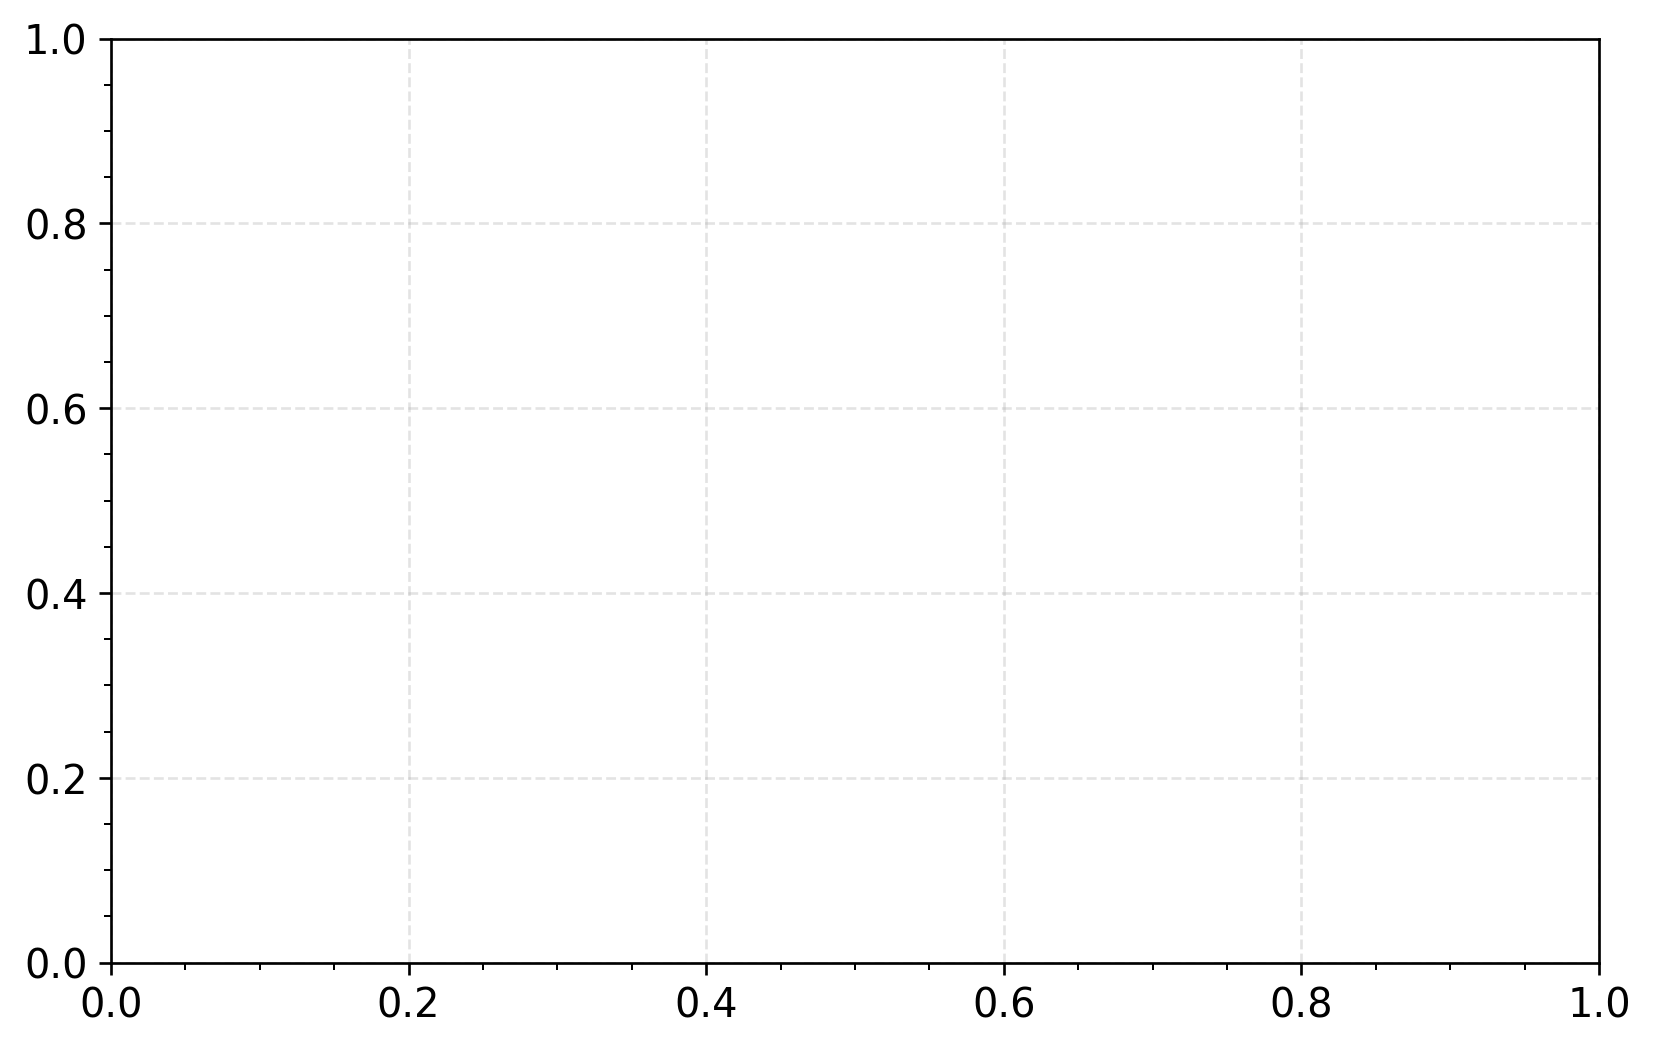

In [ ]:
### Task 1
training_losses_branched[0] = NotImplemented # model 1, YOUR ANSWER HERE
training_losses_branched[1] = NotImplemented # model 2, YOUR ANSWER HERE
training_losses_branched[2] = NotImplemented # model 3, YOUR ANSWER HERE
training_losses_branched[3] = NotImplemented # model 4, YOUR ANSWER HERE
training_losses_branched[4] = NotImplemented # model 5, YOUR ANSWER HERE

testing_losses_branched[0] = NotImplemented # model 1, YOUR ANSWER HERE
testing_losses_branched[1] = NotImplemented # model 2, YOUR ANSWER HERE
testing_losses_branched[2] = NotImplemented # model 3, YOUR ANSWER HERE
testing_losses_branched[3] = NotImplemented # model 4, YOUR ANSWER HERE
testing_losses_branched[4] = NotImplemented # model 5, YOUR ANSWER HERE

menglab.plot_model_losses(model_names, training_losses_branched, testing_losses_branched)

Task 2: What is the best model (lowest testing loss)? YOUR SOLUTION HERE

Task 3: Does adding additional polynomial always improve the model, in this case? YOUR SOLUTION HERE

## 6.3 Overfitting (the problem)

As seen in the previous section, as we add more features, the training loss improves, but the **testing loss gets worse!**
- This is a classic example of **overfitting**.
- Overfitting is considered when **Training loss is small**, but **test loss is large**.  
- In a sense, it is the opposite of **underfitting**
- Overfitting indicates the model is **too complex** - it uses many features to fit the training data closely, but fails to generalize to new data

**In our case**: The high-degree polynomials wiggle through every training point closely... but then make wilds, unrealistic predictions for new molecules in the test set.  

---

## Regularization (a solution)

**Idea:** Prevent the model from fitting the noise by discouraging “overly large” weights.  
- Large weights often mean the model is bending too aggressively to chase every training point.  
- Regularization adds a **penalty term** to the loss function that keeps weights small.

### Ridge (L2) regularization
We add a penalty proportional to the sum of squared weights:

$$
\text{RidgeLoss} = \text{RMSE} \;+\; \lambda \sum_i w_i^2
$$

- $\lambda$ = regularization strength (a hyperparameter you choose).  
- Larger $\lambda$ = stronger penalty = smoother, less wiggly curves.  

### Lasso (L1) regularization
Instead of squared weights, we penalize the absolute values:

$$
\text{LassoLoss} = \text{RMSE} \;+\; \lambda \sum_i |w_i|
$$

- Tends to drive some weights exactly to **zero**, effectively simplifying the model by dropping unnecessary features.  

---

### Why this helps
- Regularization stops the model from “chasing noise.”  
- The fitted curve is smoother, more stable, and more **generalizable** to unseen molecules.  
- In practice, we often tune both the **degree of the polynomial** *and* the **regularization strength** together to find the right balance.  


In [ ]:
model = menglab.interactive_polynomial_regression(X_train, X_test, y_train, y_test)

### ✅ Exercise 16: Training a Regularized Model [3 points total]

**Task: [1 point each]** Train 5 polynomial regressions with on the branched alkanes dataset using the following features. Use **Lasso Regularization** with $\lambda = 0.1$

- Model 1, features: $[x]$
- Model 2, features: $[x, x^2]$
- Model 3, features: $[x, x^2, x^3]$
- Model 4, features: $[x, x^2, x^3, x^4]$
- Model 5, features: $[x, x^2, x^3, x^4, \log(x)]$

**Tip:** In the "model" dropdown, select "Lasso" instead of "Linear Regression"

**Tip:** Don't forget to set $\lambda$ to the appropriate value.



1. What is the loss (RMSE) for each of the five models above? Enter the loss in the cell below. Execute the code cell to display a bar graph of model losses

2. Which is the best model (lowest testing loss)?

3. Did regularization improve the testing loss for the best model? Does regularization always improve the testing loss, in this case?

In [ ]:
# Variables (provided)
# Execute this cell to define the provided variables
training_losses_regularized = [0,0,0,0,0]
testing_losses_regularized  = [0,0,0,0,0]
model_names = ["model 1", "model 2", "model 3", "model 4", "model 5"]

In [ ]:
# Task 2
training_losses_regularized[0] = NotImplemented # model 1, YOUR ANSWER HERE
training_losses_regularized[1] = NotImplemented # model 2, YOUR ANSWER HERE
training_losses_regularized[2] = NotImplemented # model 3, YOUR ANSWER HERE
training_losses_regularized[3] = NotImplemented # model 4, YOUR ANSWER HERE
training_losses_regularized[4] = NotImplemented # model 5, YOUR ANSWER HERE

testing_losses_regularized[0] = NotImplemented # model 1, YOUR ANSWER HERE
testing_losses_regularized[1] = NotImplemented # model 2, YOUR ANSWER HERE
testing_losses_regularized[2] = NotImplemented # model 3, YOUR ANSWER HERE
testing_losses_regularized[3] = NotImplemented # model 4, YOUR ANSWER HERE
testing_losses_regularized[4] = NotImplemented # model 5, YOUR ANSWER HERE

menglab.plot_model_losses(model_names, training_losses_regularized, testing_losses_regularized)

Task 2: What is the best model (lowest testing loss)? YOUR SOLUTION HERE

Task 3: Did regularization improve the testing loss for the best model? Does regularization always improve the testing loss, in this case? YOUR SOLUTION HERE

## 6.4 Multiple Linear Regression

Ok, now we have underfitting and overfitting covered.

But we still can't capture the behavior of our data: they don't lie on a line (be it linear or nonlinear!)  
- We need to go to **higher dimensions**.  

### Adding more features
So far, we’ve only used **molecular weight** (and its powers) to predict boiling point.  
But molecules have many other structural characteristics. For example:  
- **Branching index**: a measure of how branched the molecule is.  
  - Highly branched molecules tend to have *lower* boiling points than straight-chain molecules of the same weight.  

By adding branching index as another feature, we move from a **single-variable regression** to a **multiple linear regression**:

$$
\hat{y} = b \;+\; w_1 \cdot (\text{molecular weight}) \;+\; w_2 \cdot (\text{branching index})
$$

Now, the model can capture differences between straight and branched molecules that a simple curve in one variable would miss.  

---

### Geometric view
- With one feature, the model was a **line**.  
- With polynomial features, it was a **curve** along one axis.  
- With two features (weight and branching), the model becomes a **plane** in 3D space.  
- With more features, it generalizes to a **hyperplane** in higher dimensions.  

---

### Why this helps
- Many molecular properties depend on **multiple descriptors**: weight, branching, polarity, etc.  
- By including more features, we allow the model to fit richer, more realistic patterns.  
- Multiple linear regression is the foundation of most machine learning models: combine **many features**, keep the model **linear in the weights**.  

---

The code below shows a multiple linear regression model using two input features: log(MW) and branching index
- the model can be visualized as a plane, which is trained to lie close to the data points.


In [ ]:
# Load datastet
X_train, X_test, y_train, y_test = menglab.load_multilinear_alkanes()

# Plot Multiple linear regression
menglab.plot_multiple_linear_regression(X_train, X_test, y_train, y_test)

Fitted equation:
  y = -352.174 + (157.61)·log(MW) + (-12.7501)·branching_index

Metrics:
  Train RMSE = 12.3029  Train R² = 0.97595
  Test  RMSE = 9.16045  Test  R² = 0.978415
[Renderer: colab]


---
**Interactive Multiple Linear Regression**

The code cell below can be used to interactively train a mutliple linear regression model using any combination of three possible feature inputs:
- Molecular Weight
- Log(Molecular Weight)
- branching index

If **one** feature is used, the model is visualized as "feature" vs. boiling point
- this is exactly how we have plotted the model previously

If **multiple** features are used, the model is visualized as molecular weight v.s boiling point
- this is as if we view the higher-dimensional model (a plane in 3D space) from the side.
- since the model is higher dimensional, it no longer represents a single line through molecular weight vs. boiling point. Therefore, we visualize the model predictions as points, rather than a continuous line.


In [ ]:
menglab.interactive_multiple_linear_regression(X_train, X_test, y_train, y_test)

### ✅ Exercise 16: Training a Regularized Model [3 points total]

**Task: [1 point each]** Train 5 polynomial regressions with on the branched alkanes dataset using the following features. Use **Lasso Regularization** with $\lambda = 0.1$

- Model 1, features: $[\text{MW}]$
- Model 2, features: $[\text{MW}, \text{log(MW)}]$
- Model 3, features: $[\text{MW}, \text{branching_index}]$
- Model 4, features: $[\text{MW}, \text{log(MW)}, \text{branching_index}]$
- Model 5, features: $[\text{log(MW)}, \text{branching_index}]$


**Tip:** In the "model" dropdown, select "Lasso" instead of "Linear Regression"


1. What is the loss (RMSE) for each of the five models above? Enter the loss in the cell below. Execute the code cell to display a bar graph of model losses

2. Which is the best model (lowest testing loss)?

3. Did multiple linear regression improve the testing loss for the best model, compared to regularized polynomial regression?

In [ ]:
# Variables (provided)
# Execute this cell to define the provided variables
training_losses_multiple = [0,0,0,0,0]
testing_losses_multiple  = [0,0,0,0,0]
model_names = ["model 1", "model 2", "model 3", "model 4", "model 5"]

TypeError: unsupported operand type(s) for +: 'int' and 'NotImplementedType'

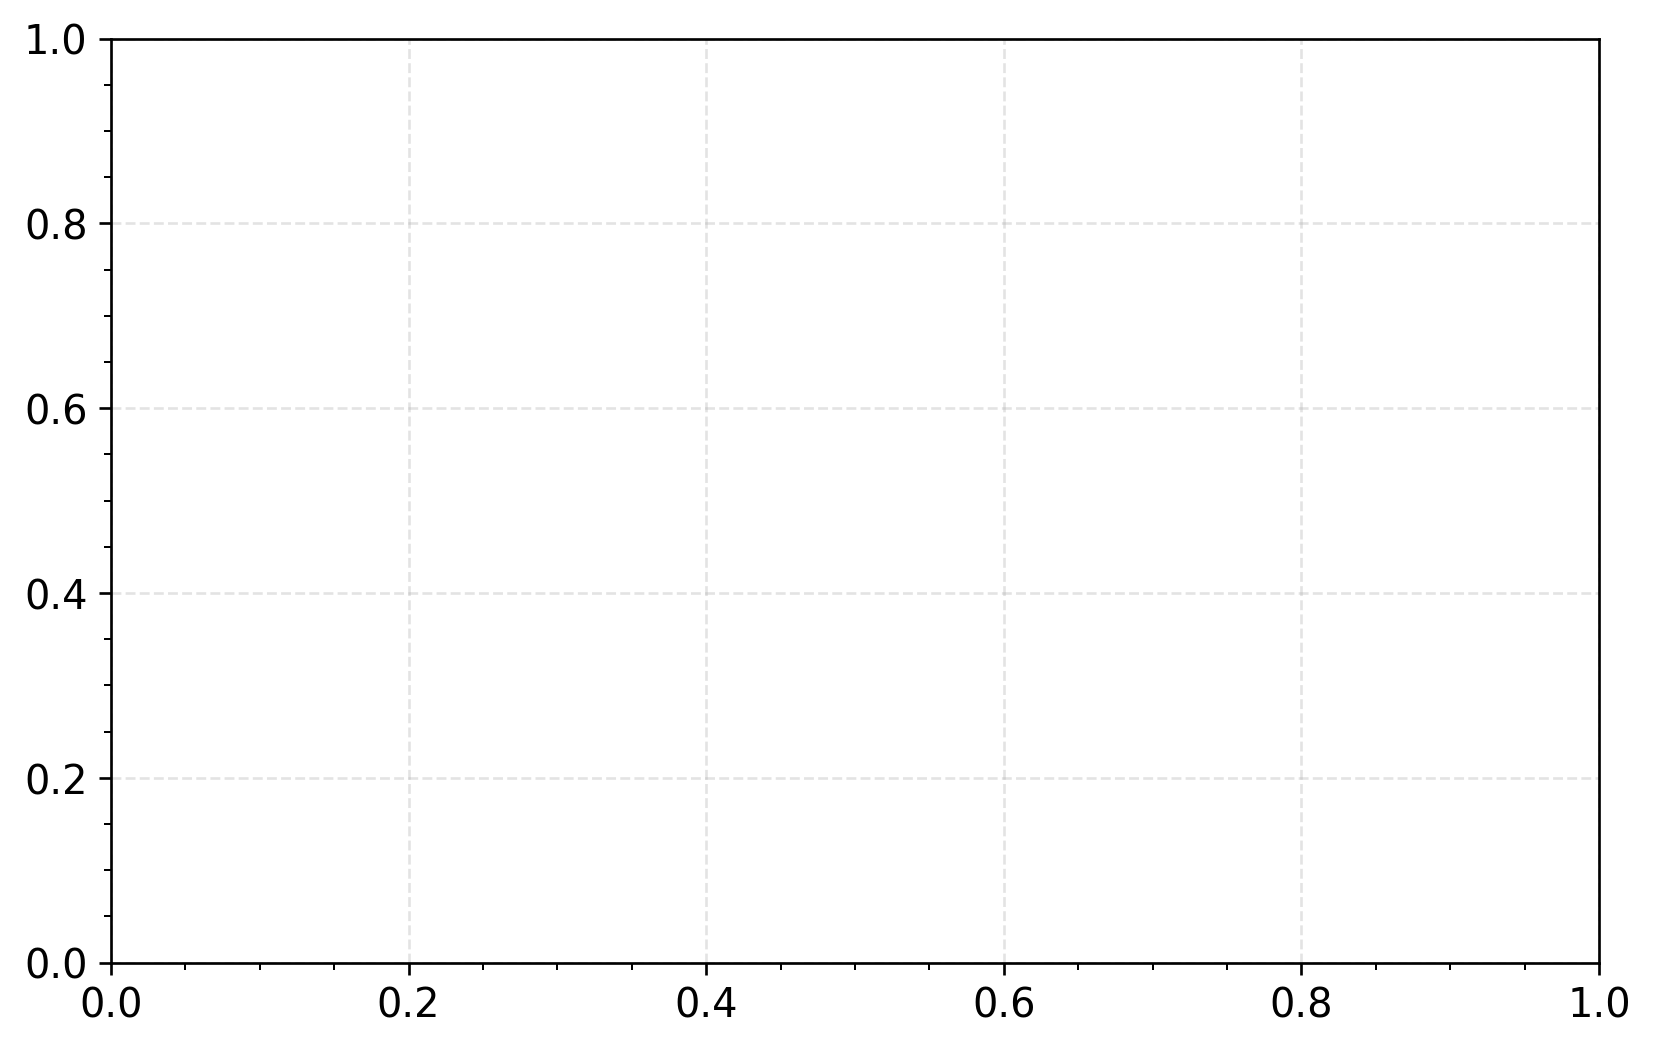

In [ ]:
# Task 2
training_losses_multiple[0] = NotImplemented # model 1, YOUR ANSWER HERE
training_losses_multiple[1] = NotImplemented # model 2, YOUR ANSWER HERE
training_losses_multiple[2] = NotImplemented # model 3, YOUR ANSWER HERE
training_losses_multiple[3] = NotImplemented # model 4, YOUR ANSWER HERE
training_losses_multiple[4] = NotImplemented # model 5, YOUR ANSWER HERE

testing_losses_multiple[0] = NotImplemented # model 1, YOUR ANSWER HERE
testing_losses_multiple[1] = NotImplemented # model 2, YOUR ANSWER HERE
testing_losses_multiple[2] = NotImplemented # model 3, YOUR ANSWER HERE
testing_losses_multiple[3] = NotImplemented # model 4, YOUR ANSWER HERE
testing_losses_multiple[4] = NotImplemented # model 5, YOUR ANSWER HERE

menglab.plot_model_losses(model_names, training_losses_multiple, testing_losses_multiple)

Task 2: What is the best model (lowest testing loss)? YOUR SOLUTION HERE

Task 3: Did multiple linear regression improve the testing loss for the best model, compared to regularized polynomial regression? YOUR SOLUTION HERE

## 6.5 Putting it all together: The full dataset

Let's try putting it all together to model the full dataset, which includes a wide variety of molecules.

A number of molecular features have been calculated for you, to use as inputs to a mutiple linear regression model.
These features describe three main aspects of molecules:  

- **Size** (e.g., Molecular Weight)  
- **Shape** (e.g., branching index, flexibility, rotatable bonds)  
- **Stickiness** (e.g., hydrogen bonding, polarity, oxygen content)  

| **Feature**         | **Meaning** | **Why It Matters for Boiling Point Prediction** |
|----------------------|-------------|------------------------------------------------|
| **name**            | The common name of the molecule (e.g., ethanol, benzene). | Mostly just for identification; not used directly in math models. |
| **smiles**          | A text code that describes the molecule’s structure. | From this, features like size and functional groups can be derived. |
| **bp_k**            | Boiling point in **Kelvin** (K). | Target variable (what you’re trying to predict). Kelvin is the standard scientific temperature scale. |
| **bp_c**            | Boiling point in **Celsius** (°C). | Same as above, but in °C. Having both units helps for comparison. |
| **MW** (Molecular Weight) | How heavy the molecule is, measured as the sum of its atoms’ weights. | Heavier molecules often need more energy (higher temperature) to boil. |
| **LogP**            | A measure of how soluble the molecule is in oil vs. water (hydrophobicity). | Molecules that dissolve in oil but not water often have weaker interactions |
| **TPSA** (Topological Polar Surface Area) | A measure of how much of the molecule’s surface can form hydrogen bonds. | Molecules with large TPSA stick together more strongly, usually raising boiling points. |
| **RotatableBonds**  | The number of single bonds that can freely rotate. | Flexibility of molecules affects how they pack together, influencing boiling. |
| **HBD** (Hydrogen Bond Donors) | Number of “–OH” or “–NH” groups that can participate in a hydrogen bond. | More donors → stronger interactions → higher boiling point. |
| **HBA** (Hydrogen Bond Acceptors) | Number of atoms (like oxygen or nitrogen) that can accept hydrogen bonds. | More acceptors → more interactions → higher boiling point. |
| **OxygenCount**     | Total number of oxygen atoms in the molecule. | Oxygen atoms increase polarity and hydrogen bonding, often raising boiling point. |
| **branching_index** | A measure of how branched the molecule is compared to a straight chain. | More branching usually lowers boiling point because molecules don’t pack together as tightly. |



In [ ]:
# load dataset
df = menglab.load_full_dataset()
df.head()

name           smiles   bp_k    bp_c       MW    LogP  \
0   bromo-trichloro-methane  C(Br)(Cl)(Cl)Cl  378.0  104.85  198.274  2.7090   
1  chloro-trifluoro-methane       ClC(F)(F)F  191.7  -81.45  104.458  1.7450   
2      carbon tetrachloride  C(Cl)(Cl)(Cl)Cl  349.8   76.65  153.823  2.5529   
3        tetrafluoromethane      C(F)(F)(F)F  145.1 -128.05   88.003  1.4757   
4                 bromoform        BrC(Br)Br  422.3  149.15  252.731  2.4547   

   TPSA  RotatableBonds  HBD  HBA  OxygenCount  branching_index  \
0   0.0             0.0  0.0  0.0          0.0                2   
1   0.0             0.0  0.0  0.0          0.0                2   
2   0.0             0.0  0.0  0.0          0.0                2   
3   0.0             0.0  0.0  0.0          0.0                2   
4   0.0             0.0  0.0  0.0          0.0                1   

  BranchingIndex_Kappa1     logMW  
0                  None  5.289650  
1                  None  4.648785  
2                  None  5.035803  
3                  None  4.477371  
4                  None  5.532326

In [ ]:
X_train, X_test, y_train, y_test = menglab.load_full_train_test_split()
menglab.interactive_full_linear_regression(X_train, X_test, y_train, y_test)

Output(layout=Layout(margin='0', padding='0', width='100%'))

### ✅ Exercise 17: Training a full Model [3 points total]

**Task:** Use the interactive GUI above to train a regression model on the full dataset.  
Your goal is to find a model with a **training loss lower than 34K**. Once you do, answer the following questions:

1. **Feature selection**  
   - Which features did you use?  
   - If you included *all* features, simply write “all.”  

2. **Feature sensitivity & underfitting**  
   - Does the model’s performance change much depending on which features are included?  
   - What does this tell you about the possibility of underfitting?  

3. **Regularization choice**  
   - Which model did you use: **Linear Regression, Ridge Regression, or Lasso Regression**?  
   - Did this involve any form of regularization?  

4. **Regularization sensitivity & overfitting**  
   - Is the model sensitive to the type or strength of regularization (i.e. the choice of $\lambda$?  
   - What does this tell you about the possibility of overfitting?  

5. **Comparison to the literature**  
   - How does your model perform compared to the results shown in *Figure 2, Figure 3, or Table 1 of Paper 2*?  
   - What training loss did they report (hint: see the Discussion section)?  
   - What do you think accounts for any differences in performance between your model and theirs?  


Task 1: Which features did you use? YOUR SOLUTION HERE

Task 2: Does the model’s performance change much depending on which features are included? What does this tell you about the possibility of underfitting? YOUR SOLUTION HERE

Task 3: Which model did you use: Linear Regression, Ridge Regression, or Lasso Regression? Did this involve any form of regularization? YOUR SOLUTION HERE

Task 4: Is the model sensitive to the type or strength of regularization (i.e. the choice of  𝜆 )? What does this tell you about the possibility of overfitting?YOUR SOLUTION HERE

Task 5: How does your model perform compared to the results shown in Figure 2, Figure 3, or Table 1 of Paper 2?
What training loss did they report (hint: see the Discussion section)? What do you think accounts for any differences in performance between your model and theirs? YOUR SOLUTION HERE

**Congratulations** You have completed Lab 2!